# Liver Model Construction: Huge Core Model

In [1]:
import os
import re
import warnings
from cobra.io import *
from cobra.io.json import *
import escher
import mass
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_
import sympy as sym
from cobra import Model, Reaction, Metabolite
import cobra.test
from os.path import join
from mass.util import qcqa, qcqa_model
from cobra import DictList
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io.json import save_json_model as save_json_mass_model
from mass.visualization import plot_comparison, plot_time_profile, plot_ensemble_phase_portrait, plot_ensemble_time_profile
mass_config = MassConfiguration()
mass_config.irreversible_Keq = float("inf")
print("MASSpy version: {0}".format(mass.__version__))
from six import iteritems
import matplotlib.pyplot as plt
from mass.thermo import (
    ConcSolver, sample_concentrations,
    update_model_with_concentration_solution)
# adding Folder_2 to the system path
sys.path.insert(0, "c:\\Users\\sicil\\LiverModel")
from cobra_dict import *
import cobra_dict as c_d
import csv
import altair as alt
from minspan.minspan import minspan,nnz
import sys
# from minspan import minspan,nnz

MASSpy version: 0.1.6


In [2]:
mass.__version__

'0.1.6'

In [3]:
cobra.__version__

'0.22.1'

In [4]:
maps_dir = os.path.abspath("maps")
data_dir = os.path.abspath("data")
dir = os.path.abspath("")
model_dir = os.path.abspath("models")
minspan_dir= os.path.abspath("minspans_csv")


### Getting reactions and metabolite data from RECON 3D

In [5]:
# making dataframe of metabolites

csv_met = os.path.join(data_dir,"big_core_met_df.csv")
met_csv_df = pd.read_csv(csv_met,index_col="id")
metabolite_info=met_csv_df.to_dict(orient='index')


### Loading cobra model

In [6]:
# Initiate empty model
trial= cobra.Model()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-02


In [7]:
#  Add all the remaining metabolites involved in the pathway
for met_id, info in metabolite_info.items():
    met = cobra.Metabolite(met_id, name=info['name'], formula=info['formula'], 
                           charge=info['charge'], compartment=info['compartment'])
    trial.add_metabolites(met)
    

In [8]:
# Loading reaction data as JSON file to maintain data types as dictionaries 
rxn_json = os.path.join(data_dir,"big_core_reaction_df.json")
with open(rxn_json) as json_file:
    rxn_data = json.load(json_file)

In [9]:
for reaction, info in rxn_data.items():
    reaction_obj = cobra.Reaction(reaction)
    reaction_obj.id=reaction
    reaction= reaction_obj.id
    reaction_obj.lower_bound = info['lower_bound']
    reaction_obj.upper_bound = info['upper_bound']
    reaction_obj.name = info['name']
    trial.add_reaction(reaction_obj)
    temp=info['metabolites']
    reaction_obj.add_metabolites(temp)
    # print(reaction)

In [10]:
#Mass balance check
for r in trial.reactions:
    print(r.id,  r.check_mass_balance())

CSm {'charge': -1.0}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {'charge': 2.0}
SUCD1m {}
FUMm {}
MDHm {'charge': -1.0}
NADH2_u10mi {'charge': 1.0}
FADH2ETC {}
CYOR_u10mi {'charge': -2.0}
CYOOm2i {'charge': 4.0}
ATPS4mi {'charge': -1.0}
Htmi {}
HEX1 {'charge': -1.0}
PGI {}
PFK {'charge': -1.0}
FBA {}
TPI {}
GAPD {'charge': -3.0}
PGK {}
PGM {}
ENO {}
PYK {'charge': 1.0}
ADK1 {}
PDHm {}
LDH_L {'charge': -1.0}
G6PDH2r {'charge': -1.0}
PGL {'charge': -1.0}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}
PCm {'charge': 1.0}
PEPCKm {}
FBP {'charge': 2.0}
G6PPer {'charge': 2.0}
G6Pter {}
GLCter {}
MALtm {}
MDH {'charge': -1.0}
PEPCK_re {}
PGMT {}
GALUi {'charge': 1.0}
GLGNS1 {'charge': -3.0}
GLBRAN {}
GLPASE1 {'charge': -6.0}
GLDBRAN {}
GLPASE2 {}
GGNG {'charge': -8.0}
ACACT1m {}
HMGCOASm {'charge': 1.0}
HMGLm {}
ADCim {'charge': 1.0}
BDHm {'charge': -1.0}
OCOAT1m {}
NDPK1 {}
NDPK1m {}
NDPK2 {}
HCO3Em {'charge': -1.0}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
CITtam {}
CITL {}
ME2 {}
ACS {}
ARGN {}
OCBT

In [11]:
trial.reactions.G6PPer

<Reaction G6PPer at 0x251212aaac0>

In [12]:
trial.metabolites.h_c.charge= 1
trial.metabolites.h_m.charge= 1
trial.metabolites.pi_r.charge= -2
trial.metabolites.h_i.charge= 1
trial.metabolites.pi_c.charge= -2
trial.metabolites.pi_m.charge= -2

In [13]:
for r in trial.reactions:
    print(r.id,  r.check_mass_balance())

CSm {}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {}
SUCD1m {}
FUMm {}
MDHm {}
NADH2_u10mi {}
FADH2ETC {}
CYOR_u10mi {}
CYOOm2i {}
ATPS4mi {}
Htmi {}
HEX1 {}
PGI {}
PFK {}
FBA {}
TPI {}
GAPD {}
PGK {}
PGM {}
ENO {}
PYK {}
ADK1 {}
PDHm {}
LDH_L {}
G6PDH2r {}
PGL {}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}
PCm {}
PEPCKm {}
FBP {}
G6PPer {}
G6Pter {}
GLCter {}
MALtm {}
MDH {}
PEPCK_re {}
PGMT {}
GALUi {}
GLGNS1 {}
GLBRAN {}
GLPASE1 {}
GLDBRAN {}
GLPASE2 {}
GGNG {}
ACACT1m {}
HMGCOASm {}
HMGLm {}
ADCim {}
BDHm {}
OCOAT1m {}
NDPK1 {}
NDPK1m {}
NDPK2 {}
HCO3Em {}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
CITtam {}
CITL {}
ME2 {}
ACS {}
ARGN {}
OCBTm {}
ARGSS {}
ARGSL {}
CBPSam {}
NH4tm {}
GDHm {}
GLNS {}
GLUN {}
ALATA_L {}
CYSO {}
3SALATAi {}
3SPYRSP {}
PGCD {}
PSERT {}
PSP_L {}
GHMT2r {}
ASNS1 {}
GLYtm {}
MLTHFtm {}
THFtm {}
KHK {}
FBA2 {}
TRIOK {}
ALCD19y {}
GLYK {}
2AMACHYD {}
SERHL {}
ALCD2x {}
ACALDtm {}
ALDD2xm {}
ACSm {}
Htm {}
O2tm {}
H2Otr {}
H2Otm {}
PItm {}
PItr {}
CO2tm {}
PPA {}
HCO

In [14]:
trial.objective = 'ATPS4mi'
solution= trial.optimize()
solution
# df= flux.to_frame()
# df.loc["EX_glc__D_c"]
# flux.loc["EX_glc__D_c"]

<Solution 28.000 at 0x25121342790>

In [15]:
# #Function to load data from the excel sheet
# def load_data(filepath, sheet_name):
#     """Load Liver data from an excel sheet"""
#     df = pd.read_excel(engine='openpyxl',
#         io=filepath,
#         sheet_name=sheet_name,
#         index_col=0)
#     return df

In [16]:
# #Compare Results
# excel_ic = os.path.join(data_dir,"Fluxes_Data.xlsx")
# # ic_df = pd.read_csv(csv_ic)
# # ic_df.set_index()
# fluxes = load_data(
#     filepath=excel_ic,
#     sheet_name="Model_data"
#     )
# # ic_info_all.reset_index(level='ID', col_level=1, inplace=True)

# fluxes

In [17]:
# rows_of_interest = ['glygn2_c', 'glc__D_c','gly_c']
# fluxes= fluxes.loc[rows_of_interest]
# # fluxes = fluxes
# fluxes

In [18]:
# print("Setting Experimental fluxes\n------------------")

# for reaction in trial.reactions:
#     #Setting inital condition of metabolties from HEPATOKIN  #M 
#     if 'EX_' in reaction.id:
#         for met in reaction.metabolites:
#             # print(met)
#             if met.id in fluxes.index:
#                 mid=met.id
#                 # print(mid)
#                 flux = fluxes.loc[mid,'val']
#                 # print(flux)
#             #     row = [mid,ic_value]
#             #     # column = [ic_value]
#             #     # conc_df.append(row)
#                 # reaction.lower_bound =  flux       
#                 reaction.upper_bound =  -flux     #mol/L*hr = M/hr
                
#                 print(reaction.id, reaction.lower_bound, reaction.upper_bound)       
# # for metabolite, ic_value in liver.initial_conditions.items():
# #     print("{0}: {1}".format(metabolite, ic_value))

In [19]:
# trial.reactions.EX_lac__L_c.lower_bound = -1000
# trial.reactions.EX_glygn2_c.upper_bound = 0

In [20]:
for r in trial.reactions:
    if 'EX_' in r.id:
    
        print(r.id, r.lower_bound, r.upper_bound)

EX_h_c -1000.0 1000.0
EX_pyr_c 0.0 1000.0
EX_h2o_c -1000.0 1000.0
EX_pi_c -1000.0 1000.0
EX_glc__D_c -1.0 1000.0
EX_lac__L_c 0.0 1000.0
EX_co2_c 0.0 1000.0
EX_o2_c -1000.0 1000.0
EX_octa_prod_c 0.0 1000.0
EX_octa_cons_c 0.0 0.0
EX_urea_c 0.0 1000.0
EX_gln__L_c 0.0 1000.0
EX_acetone_c 0.0 1000.0
EX_bhb_c 0.0 1000.0
EX_glu__L_c 0.0 1000.0
EX_ser__L_c 0.0 1000.0
EX_cys__L_c 0.0 1000.0
EX_gly_c 0.0 1000.0
EX_glygn2_c 0.0 1000.0
EX_Tyr_ggn_c -1000.0 1000.0
EX_ala__L_c 0.0 1000.0
EX_nh4_c -1000.0 0.0
EX_so3_c 0.0 1000.0
EX_etoh_c 0.0 1000.0
EX_glyc_3octa_c 0.0 1000.0
EX_fru_c 0.0 1000.0
EX_r5p_c 0.0 1000.0
EX_o2s_c -1000.0 1000.0


In [21]:
# futile_cycle_1 = trial.problem.Constraint(
#     trial.reactions.PFK.flux_expression - trial.reactions.FBP.flux_expression,
#     lb=-60,
#     ub=60)
# trial.add_cons_vars(futile_cycle_1)


# futile_cycle_2 = trial.problem.Constraint(
#     trial.reactions.HEX1.flux_expression - trial.reactions.G6PPer.flux_expression,
#     lb=-1000,
#     ub=1000)
# trial.add_cons_vars(futile_cycle_2)

# # try doubling the two above because of the 2:1 ratio
# futile_cycle_3 = trial.problem.Constraint(
#     trial.reactions.PYK.flux_expression - trial.reactions.PCm.flux_expression,
#     lb=-20,
#     ub=20)
# trial.add_cons_vars(futile_cycle_3)


# constraint = trial.problem.Constraint(-
#     trial.reactions.EX_glc__D_c.flux_expression 
#     - trial.reactions.EX_glygn2_c.flux_expression,
#     lb=-20,
#     ub=20)
# trial.add_cons_vars(constraint)

In [22]:
# dual_objective = trial.problem.Objective(
#     -trial.reactions.EX_glc__D_c.flux_expression+
#     trial.reactions.EX_glygn2_c.flux_expression,
#     direction='max')
# trial.objective = dual_objective
# solution = trial.optimize(objective_sense='maximise')
# # try adding ratios of glycogen to glucose in objective function
# # try making the flux reactons of PGI, GLUT2, 
# solution

In [23]:
# #Escher FBA: shows the solutions on the map
initial_flux_data = {
    reaction: flux
    for reaction, flux in solution.fluxes.items()}


#view all the reactions that we need build
escher_builder = escher.Builder(
    # model=trial,
    map_json=os.path.join(
        maps_dir,"core_map_v23.json")
        # ,highlight_missing=True
    , reaction_data=initial_flux_data
    )

# Display map in notebook
escher_builder

Builder(reaction_data={'CSm': 2.0, 'ACONTm': 2.0, 'ICDHxm': 2.0, 'AKGDm': 2.0, 'SUCOASm': 27.999999999999996, …

In [24]:
from tqdm import tqdm
from scipy.integrate import solve_ivp

# dFBA analysis

In [25]:
# def add_dynamic_bounds(trial, y):
#     """Use external concentrations to bound the uptake flux of glucose."""
#     atpm, glucose = y  # expand the boundary species
#     glucose_max_import = -10 * glucose / (5 + glucose)
#     trial.reactions.EX_glc__D_c.lower_bound = glucose_max_import


# def dynamic_system(t, y):
#     """Calculate the time derivative of external species."""

#     atpm, glucose = y  # expand the boundary species

#     # Calculate the specific exchanges fluxes at the given external concentrations.
#     with trial:
#         add_dynamic_bounds(trial, y)

#         cobra.util.add_lp_feasibility(trial)
#         feasibility = cobra.util.fix_objective_as_constraint(trial)
#         lex_constraints = cobra.util.add_lexicographic_constraints(
#             trial, ['EX_glygn2_c', 'EX_glc__D_c'], ['max', 'min'])
# # try max and mim 
#     # Since the calculated fluxes are specific rates, we multiply them by the
#     # biomass concentration to get the bulk exchange rates.
#     fluxes = lex_constraints.values
#     # fluxes *= atpm

#     # This implementation is **not** efficient, so I display the current
#     # simulation time using a progress bar.
#     if dynamic_system.pbar is not None:
#         dynamic_system.pbar.update(1)
#         dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

#     return fluxes

# dynamic_system.pbar = None


# def infeasible_event(t, y):
#     """
#     Determine solution feasibility.

#     Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
#     This function re-solves the LP to determine whether or not the solution is feasible
#     (and if not, how far it is from feasibility). When the sign of this function changes
#     from -epsilon to positive, we know the solution is no longer feasible.

#     """

#     with trial:

#         add_dynamic_bounds(trial, y)

#         cobra.util.add_lp_feasibility(trial)
#         feasibility = cobra.util.fix_objective_as_constraint(trial)

#     return feasibility - infeasible_event.epsilon

# infeasible_event.epsilon = 1E-6
# infeasible_event.direction = 1
# infeasible_event.terminal = True

In [26]:
# ts = np.linspace(0, 15, 100)  # Desired integration resolution and interval
# y0 = [0.1, 10]

# with tqdm() as pbar:
#     dynamic_system.pbar = pbar

#     sol = solve_ivp(
#         fun=dynamic_system,
#         events=[infeasible_event],
#         t_span=(ts.min(), ts.max()),
#         y0=y0,
#         t_eval=ts,
#         rtol=1e-6,
#         atol=1e-8,
#         method='BDF'
#     )

In [27]:
# ax = plt.subplot(111)
# ax.plot(sol.t, sol.y.T[:, 0])
# ax2 = plt.twinx(ax)
# ax2.plot(sol.t, sol.y.T[:, 1], color='r')

# ax.set_ylabel('Glycogen', color='b')
# ax2.set_ylabel('Glucose', color='r')

## FVA analysis

In [28]:
# from cobra.flux_analysis import flux_variability_analysis

In [29]:
# dual_objective = trial.problem.Objective(
#     -trial.reactions.EX_glygn2_c.flux_expression-
#     trial.reactions.EX_glc__D_c.flux_expression,
#     direction='min')
# trial.objective = dual_objective
# solution = trial.optimize(objective_sense='maximise')
# # try adding ratios of glycogen to glucose in objective function
# # try making the flux reactons of PGI, GLUT2, 
# solution

In [30]:
# fva = flux_variability_analysis(trial, fraction_of_optimum= 0.1)
# # fva = fva.T
# fva

combined =trial.copy()
data_1 = cobra.sampling.sample(combined, 5000, method = "optgp", processes = 5)

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpfo9rb1da.lp
Reading time = 0.01 seconds
: 183 rows, 384 columns, 1448 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpf_1c17cj.lp
Reading time = 0.01 seconds
: 183 rows, 384 columns, 1448 nonzeros


In [31]:
# for i in fva.index:
#     # print(i,fva.loc[i,"minimum"])
#     min = fva.loc[i,"minimum"]
#     max = fva.loc[i,"maximum"]
#     reaction = trial.reactions.get_by_id(i)
#     reaction.lower_bound = min
#     reaction.upper_bound = max
#     print(reaction.id, reaction.lower_bound, reaction.upper_bound)

In [32]:
# combined =trial.copy()
# data_1 = cobra.sampling.sample(trial, 5000, method = "optgp", processes = 5)

Text(0.5, 0, 'EX_glc__D_c flux')

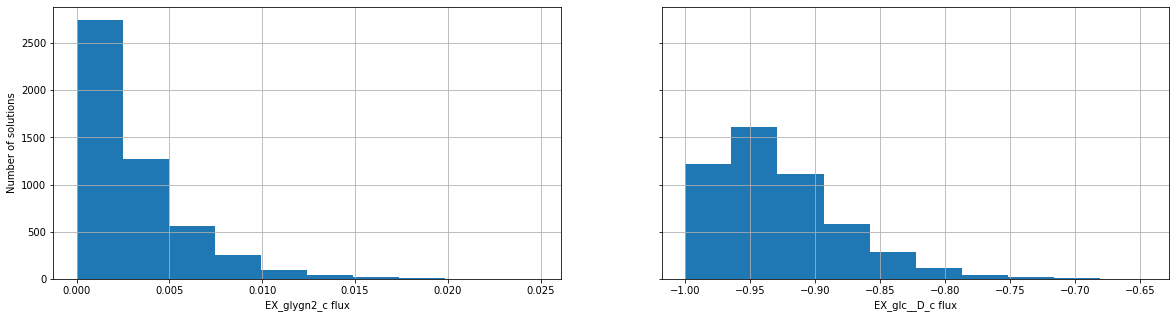

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
ax = axes[0]
data_1['EX_glygn2_c'].hist(ax=ax)

ax.set_xlabel('EX_glygn2_c flux')
ax.set_ylabel('Number of solutions')

ax = axes[1]
ax = data_1['EX_glc__D_c'].hist(ax=ax)
ax.set_xlabel('EX_glc__D_c flux')

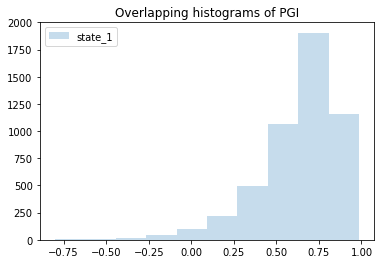

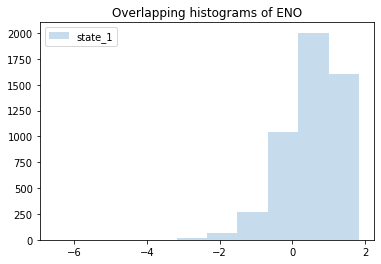

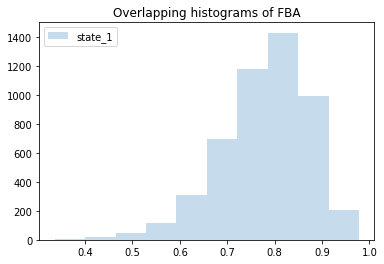

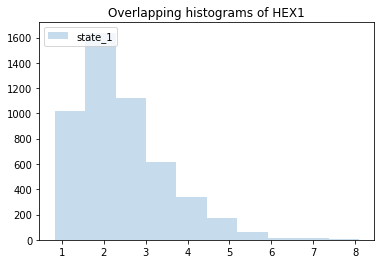

In [34]:
list_rxn =['PGI', 'ENO', "FBA", "HEX1"]
# #  GAPDH, ENO, FBA, PGI, PGMT
for i in list_rxn:
    plt.hist(data_1[i], 
         alpha=0.25, # the transaparency parameter
         label='state_1')
#     x_position = mean_flux.loc[i, "mean"]
    
    plt.legend(loc='upper left')
    plt.title('Overlapping histograms of '+str(i))
    plt.show()

In [35]:
mean_flux_1 = pd.DataFrame( columns =["reaction","mean", "stdev"])
# means =[]
# std=[]
for i in data_1.columns:
    mean = data_1[i].mean()
    # print(index)
    # means.append(index)
    std = data_1[i].std()
    mean_flux_1.loc[len(mean_flux_1.index)] = [i, mean, std]
# mean_flux["Mean_gluco"] = means
# mean_flux["ST_dev_gluco"] = std
mean_flux = mean_flux_1.set_index("reaction")
mean_flux

mean     stdev
reaction                    
CSm       0.906060  0.206080
ACONTm    0.827155  0.207175
ICDHxm    0.827155  0.207175
AKGDm     0.730852  0.219847
SUCOASm   0.483284  1.110485
...            ...       ...
GTHPi     0.000000  0.000000
GTHOr     0.000000  0.000000
NADPHM    0.769708  0.555730
EX_r5p_c  0.041818  0.040388
EX_o2s_c  0.000000  0.000000

[192 rows x 2 columns]

In [36]:
# data_1= data_1.T
data_1.index.name='reactions'
# data_1 = data_1.reset_index(drop=True)
data_1.T


reactions      0         1         2         3         4         5     \
CSm        0.464920  1.254677  1.301952  0.811568  1.142070  1.151483   
ACONTm     0.464893  1.167247  1.197608  0.809350  1.131103  1.127871   
ICDHxm     0.464893  1.167247  1.197608  0.809350  1.131103  1.127871   
AKGDm      0.277587  1.082812  1.163855  0.789853  1.097224  1.077078   
SUCOASm    1.232538 -0.400819 -0.614418  0.131233 -0.361239  1.634358   
...             ...       ...       ...       ...       ...       ...   
GTHPi      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
GTHOr      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
NADPHM     0.150710  0.793333  0.372308  0.471281  0.312122  0.814362   
EX_r5p_c   0.001493  0.028657  0.044793  0.001472  0.036246  0.005305   
EX_o2s_c   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

reactions      6         7         8         9     ...      4990      4991  \
CSm        1.066534  0.829700  0.892680  0.895845  ...  0.611565  0.714239   
ACONTm     0.989594  0.760983  0.891130  0.833503  ...  0.549116  0.678231   
ICDHxm     0.989594  0.760983  0.891130  0.833503  ...  0.549116  0.678231   
AKGDm      0.960471  0.756215  0.841374  0.819065  ...  0.485126  0.607674   
SUCOASm    1.912037  0.138833  1.085401  1.063264  ...  0.299730 -0.438605   
...             ...       ...       ...       ...  ...       ...       ...   
GTHPi      0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
GTHOr      0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
NADPHM     0.171183  0.449124  1.344284  1.012519  ...  0.801286  1.892602   
EX_r5p_c   0.175256  0.120872  0.097616  0.070347  ...  0.018556  0.083534   
EX_o2s_c   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

reactions      4992      4993      4994      4995      4996      4997  \
CSm        0.910374  0.898403  0.997088  0.922210  1.028077  0.711660   
ACONTm     0.752056  0.887329  0.957684  0.821147  0.936807  0.711517   
ICDHxm     0.752056  0.887329  0.957684  0.821147  0.936807  0.711517   
AKGDm      0.693339  0.790879  0.899933  0.755670  0.883979  0.640469   
SUCOASm   -0.623228 -0.782166  0.613932  1.024726  0.717696  0.715920   
...             ...       ...       ...       ...       ...       ...   
GTHPi      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
GTHOr      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
NADPHM     0.435602  1.435174  0.784563  0.526736  0.296870  1.043679   
EX_r5p_c   0.065290  0.028359  0.006952  0.014585  0.006492  0.042756   
EX_o2s_c   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

reactions      4998      4999  
CSm        0.748781  0.849630  
ACONTm     0.723587  0.789654  
ICDHxm     0.723587  0.789654  
AKGDm      0.617989  0.730892  
SUCOASm   -0.550726  0.896133  
...             ...       ...  
GTHPi      0.000000  0.000000  
GTHOr      0.000000  0.000000  
NADPHM     0.330506  0.414950  
EX_r5p_c   0.080807  0.051819  
EX_o2s_c   0.000000  0.000000  

[192 rows x 5000 columns]

In [37]:
# alt.Chart(source).mark_boxplot(extent='min-max').encode(
#     x='age:O',
#     y='people:Q'
# )

In [38]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 16))

# pos = data_1.columns
# axs.violinplot(data_1,
# #  pos,
#   points=200, vert=False, widths=1.1,
#                      showmeans=True, 
#                      showextrema=True, showmedians=True,
#                      bw_method=0.5)
# axs.set_title('Custom violinplot 8', fontsize=10)

In [39]:
# fig = plt.figure(figsize = (10, 5))
 
# # creating the bar plot
# plt.bar(courses, values, color ='maroon',
#         width = 0.4)
 
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show(

In [40]:
data_2 = data_1
for i in data_1.columns:
    if (i.__contains__("EX_")):
        print("String contains", i)
    else: 
        data_2= data_2.drop([i], axis = 1)

data_2

String contains EX_h_c
String contains EX_pyr_c
String contains EX_h2o_c
String contains EX_pi_c
String contains EX_glc__D_c
String contains EX_lac__L_c
String contains EX_co2_c
String contains EX_o2_c
String contains EX_octa_prod_c
String contains EX_octa_cons_c
String contains EX_urea_c
String contains EX_gln__L_c
String contains EX_acetone_c
String contains EX_bhb_c
String contains EX_glu__L_c
String contains EX_ser__L_c
String contains EX_cys__L_c
String contains EX_gly_c
String contains EX_glygn2_c
String contains EX_Tyr_ggn_c
String contains EX_ala__L_c
String contains EX_nh4_c
String contains EX_so3_c
String contains EX_etoh_c
String contains EX_glyc_3octa_c
String contains EX_fru_c
String contains EX_r5p_c
String contains EX_o2s_c


EX_h_c  EX_pyr_c  EX_h2o_c   EX_pi_c  EX_glc__D_c  EX_lac__L_c  \
reactions                                                                     
0          3.113398  0.001878  2.084617 -0.001493    -0.993405     1.216029   
1          2.807926  0.034461  3.902646 -0.028657    -0.965747     0.077229   
2          1.483854  0.101919  4.076006 -0.044793    -0.969487     0.113044   
3          1.819818  0.114693  2.986224 -0.001472    -0.868942     0.015047   
4          1.255131  0.069940  3.683398 -0.036246    -0.848393     0.074292   
...             ...       ...       ...       ...          ...          ...   
4995       2.087628  0.167733  3.240541 -0.014585    -0.958842     0.025699   
4996       1.855865  0.132580  3.741995 -0.006492    -0.962376     0.025618   
4997       3.144247  0.235766  2.467425 -0.042756    -0.951989     0.040618   
4998       1.782679  0.150726  3.126266 -0.080807    -0.910715     0.009959   
4999       2.157757  0.054967  3.187148 -0.051819    -0.970601     0.105329   

           EX_co2_c   EX_o2_c  EX_octa_prod_c  EX_octa_cons_c  ...  \
reactions                                                      ...   
0          0.548460 -1.139462        0.000007             0.0  ...   
1          3.505003 -3.508136        0.021857             0.0  ...   
2          3.778880 -3.761907        0.026086             0.0  ...   
3          2.602843 -2.635638        0.000554             0.0  ...   
4          3.395017 -3.412967        0.002742             0.0  ...   
...             ...       ...             ...             ...  ...   
4995       2.816653 -2.734089        0.025266             0.0  ...   
4996       2.852670 -3.037417        0.022817             0.0  ...   
4997       2.476669 -2.199404        0.000036             0.0  ...   
4998       2.340883 -2.451021        0.006299             0.0  ...   
4999       2.333387 -2.524064        0.014994             0.0  ...   

            EX_glygn2_c  EX_Tyr_ggn_c  EX_ala__L_c  EX_nh4_c  EX_so3_c  \
reactions                                                                
0          5.098066e-07 -5.098066e-07     0.001539 -1.496186       0.0   
1          3.967316e-04 -3.967316e-04     0.081989 -1.039058       0.0   
2          4.271776e-04 -4.271776e-04     0.004093 -0.484270       0.0   
3          4.442370e-03 -4.442370e-03     0.070856 -0.670134       0.0   
4          1.486235e-03 -1.486235e-03     0.103905 -0.444089       0.0   
...                 ...           ...          ...       ...       ...   
4995       2.973391e-03 -2.973391e-03     0.179281 -0.670122       0.0   
4996       1.707955e-03 -1.707955e-03     0.182413 -0.975508       0.0   
4997       2.094644e-03 -2.094644e-03     0.040224 -0.661824       0.0   
4998       1.894264e-04 -1.894264e-04     0.026304 -0.776675       0.0   
4999       1.349663e-03 -1.349663e-03     0.101252 -1.088316       0.0   

           EX_etoh_c  EX_glyc_3octa_c  EX_fru_c  EX_r5p_c  EX_o2s_c  
reactions                                                            
0                0.0              0.0       0.0  0.001493       0.0  
1                0.0              0.0       0.0  0.028657       0.0  
2                0.0              0.0       0.0  0.044793       0.0  
3                0.0              0.0       0.0  0.001472       0.0  
4                0.0              0.0       0.0  0.036246       0.0  
...              ...              ...       ...       ...       ...  
4995             0.0              0.0       0.0  0.014585       0.0  
4996             0.0              0.0       0.0  0.006492       0.0  
4997             0.0              0.0       0.0  0.042756       0.0  
4998             0.0              0.0       0.0  0.080807       0.0  
4999             0.0              0.0       0.0  0.051819       0.0  

[5000 rows x 28 columns]

In [41]:
# data_2 = data_1.T
data_2= data_2.T
data_2

reactions                0         1         2         3         4     \
EX_h_c           3.113398e+00  2.807926  1.483854  1.819818  1.255131   
EX_pyr_c         1.878014e-03  0.034461  0.101919  0.114693  0.069940   
EX_h2o_c         2.084617e+00  3.902646  4.076006  2.986224  3.683398   
EX_pi_c         -1.492516e-03 -0.028657 -0.044793 -0.001472 -0.036246   
EX_glc__D_c     -9.934054e-01 -0.965747 -0.969487 -0.868942 -0.848393   
EX_lac__L_c      1.216029e+00  0.077229  0.113044  0.015047  0.074292   
EX_co2_c         5.484595e-01  3.505003  3.778880  2.602843  3.395017   
EX_o2_c         -1.139462e+00 -3.508136 -3.761907 -2.635638 -3.412967   
EX_octa_prod_c   6.670889e-06  0.021857  0.026086  0.000554  0.002742   
EX_octa_cons_c   0.000000e+00  0.000000  0.000000  0.000000  0.000000   
EX_urea_c        5.675136e-01  0.308575  0.116920  0.033244  0.092512   
EX_gln__L_c      1.246752e-01  0.043217  0.028986  0.002259  0.006995   
EX_acetone_c     1.923923e-03  0.005067  0.024541  0.055962  0.012858   
EX_bhb_c         3.524686e-02  0.007435  0.009153  0.059589  0.012941   
EX_glu__L_c      6.263068e-02  0.041219  0.004767  0.017239  0.026884   
EX_ser__L_c      6.039247e-06  0.163886  0.156913  0.144987  0.068855   
EX_cys__L_c      0.000000e+00  0.000000  0.000000  0.000000  0.000000   
EX_gly_c         4.763186e-02  0.048379  0.026686  0.366047  0.045431   
EX_glygn2_c      5.098066e-07  0.000397  0.000427  0.004442  0.001486   
EX_Tyr_ggn_c    -5.098066e-07 -0.000397 -0.000427 -0.004442 -0.001486   
EX_ala__L_c      1.539357e-03  0.081989  0.004093  0.070856  0.103905   
EX_nh4_c        -1.496186e+00 -1.039058 -0.484270 -0.670134 -0.444089   
EX_so3_c         0.000000e+00  0.000000  0.000000  0.000000  0.000000   
EX_etoh_c        0.000000e+00  0.000000  0.000000  0.000000  0.000000   
EX_glyc_3octa_c  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
EX_fru_c         0.000000e+00  0.000000  0.000000  0.000000  0.000000   
EX_r5p_c         1.492516e-03  0.028657  0.044793  0.001472  0.036246   
EX_o2s_c         0.000000e+00  0.000000  0.000000  0.000000  0.000000   

reactions            5         6         7         8         9     ...  \
EX_h_c           3.113627  1.233351  1.748112  3.832380  3.019656  ...   
EX_pyr_c         0.070517  0.167182  0.147483  0.085770  0.058700  ...   
EX_h2o_c         3.839579  3.858362  2.734035  2.517290  2.743285  ...   
EX_pi_c         -0.005305 -0.175256 -0.120872 -0.097616 -0.070347  ...   
EX_glc__D_c     -0.923505 -0.966177 -0.850830 -0.859664 -0.836459  ...   
EX_lac__L_c      0.015731  0.008299  0.075882  0.031056  0.041885  ...   
EX_co2_c         3.221013  3.032222  2.302153  2.618459  2.742730  ...   
EX_o2_c         -3.400836 -3.144342 -2.365714 -2.393218 -2.467983  ...   
EX_octa_prod_c   0.005903  0.019235  0.017179  0.000387  0.015585  ...   
EX_octa_cons_c   0.000000  0.000000  0.000000  0.000000  0.000000  ...   
EX_urea_c        0.370631  0.214010  0.082831  0.259121  0.297326  ...   
EX_gln__L_c      0.027882  0.019384  0.000371  0.036403  0.009460  ...   
EX_acetone_c     0.003578  0.043061  0.001551  0.045641  0.120756  ...   
EX_bhb_c         0.067907  0.066807  0.014877  0.018501  0.016774  ...   
EX_glu__L_c      0.022912  0.009739  0.004398  0.013353  0.004977  ...   
EX_ser__L_c      0.030212  0.025819  0.234729  0.068779  0.054206  ...   
EX_cys__L_c      0.000000  0.000000  0.000000  0.000000  0.000000  ...   
EX_gly_c         0.391705  0.013617  0.144659  0.283360  0.092829  ...   
EX_glygn2_c      0.000398  0.000549  0.001622  0.001384  0.001172  ...   
EX_Tyr_ggn_c    -0.000398 -0.000549 -0.001622 -0.001384 -0.001172  ...   
EX_ala__L_c      0.060077  0.103760  0.039856  0.038205  0.091112  ...   
EX_nh4_c        -1.301932 -0.619724 -0.590045 -0.994745 -0.856696  ...   
EX_so3_c         0.000000  0.000000  0.000000  0.000000  0.000000  ...   
EX_etoh_c        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
EX_glyc_3octa_c  0.000000  0.000

In [42]:
# data_2
# Create own index
index = list(data_2.index.values)
  
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data_2, index)
  
# remove own index with default index
df.reset_index(inplace = True, drop = False)
# df.index.names = ['numbers']
df.rename(columns = {'index':'RXNS'}, inplace = True)
df

reactions             RXNS             0         1         2         3  \
0                   EX_h_c  3.113398e+00  2.807926  1.483854  1.819818   
1                 EX_pyr_c  1.878014e-03  0.034461  0.101919  0.114693   
2                 EX_h2o_c  2.084617e+00  3.902646  4.076006  2.986224   
3                  EX_pi_c -1.492516e-03 -0.028657 -0.044793 -0.001472   
4              EX_glc__D_c -9.934054e-01 -0.965747 -0.969487 -0.868942   
5              EX_lac__L_c  1.216029e+00  0.077229  0.113044  0.015047   
6                 EX_co2_c  5.484595e-01  3.505003  3.778880  2.602843   
7                  EX_o2_c -1.139462e+00 -3.508136 -3.761907 -2.635638   
8           EX_octa_prod_c  6.670889e-06  0.021857  0.026086  0.000554   
9           EX_octa_cons_c  0.000000e+00  0.000000  0.000000  0.000000   
10               EX_urea_c  5.675136e-01  0.308575  0.116920  0.033244   
11             EX_gln__L_c  1.246752e-01  0.043217  0.028986  0.002259   
12            EX_acetone_c  1.923923e-03  0.005067  0.024541  0.055962   
13                EX_bhb_c  3.524686e-02  0.007435  0.009153  0.059589   
14             EX_glu__L_c  6.263068e-02  0.041219  0.004767  0.017239   
15             EX_ser__L_c  6.039247e-06  0.163886  0.156913  0.144987   
16             EX_cys__L_c  0.000000e+00  0.000000  0.000000  0.000000   
17                EX_gly_c  4.763186e-02  0.048379  0.026686  0.366047   
18             EX_glygn2_c  5.098066e-07  0.000397  0.000427  0.004442   
19            EX_Tyr_ggn_c -5.098066e-07 -0.000397 -0.000427 -0.004442   
20             EX_ala__L_c  1.539357e-03  0.081989  0.004093  0.070856   
21                EX_nh4_c -1.496186e+00 -1.039058 -0.484270 -0.670134   
22                EX_so3_c  0.000000e+00  0.000000  0.000000  0.000000   
23               EX_etoh_c  0.000000e+00  0.000000  0.000000  0.000000   
24         EX_glyc_3octa_c  0.000000e+00  0.000000  0.000000  0.000000   
25                EX_fru_c  0.000000e+00  0.000000  0.000000  0.000000   
26                EX_r5p_c  1.492516e-03  0.028657  0.044793  0.001472   
27                EX_o2s_c  0.000000e+00  0.000000  0.000000  0.000000   

reactions         4         5         6         7         8  ...      4990  \
0          1.255131  3.113627  1.233351  1.748112  3.832380  ...  2.556087   
1          0.069940  0.070517  0.167182  0.147483  0.085770  ...  0.289034   
2          3.683398  3.839579  3.858362  2.734035  2.517290  ...  2.031557   
3         -0.036246 -0.005305 -0.175256 -0.120872 -0.097616  ... -0.018556   
4         -0.848393 -0.923505 -0.966177 -0.850830 -0.859664  ... -0.868866   
5          0.074292  0.015731  0.008299  0.075882  0.031056  ...  0.106404   
6          3.395017  3.221013  3.032222  2.302153  2.618459  ...  2.041429   
7         -3.412967 -3.400836 -3.144342 -2.365714 -2.393218  ... -1.717574   
8          0.002742  0.005903  0.019235  0.017179  0.000387  ...  0.015612   
9          0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
10         0.092512  0.370631  0.214010  0.082831  0.259121  ...  0.012409   
11         0.006995  0.027882  0.019384  0.000371  0.036403  ...  0.036644   
12         0.012858  0.003578  0.043061  0.001551  0.045641  ...  0.044612   
13         0.012941  0.067907  0.066807  0.014877  0.018501  ...  0.104541   
14         0.026884  0.022912  0.009739  0.004398  0.013353  ...  0.027347   
15         0.068855  0.030212  0.025819  0.234729  0.068779  ...  0.035668   
16         0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
17         0.045431  0.391705  0.013617  0.144659  0.283360  ...  0.027503   
18         0.001486  0.000398  0.000549  0.001622  0.001384  ...  0.000842   
19        -0.001486 -0.000398 -0.000549 -0.001622 -0.001384  ... -0.000842   
20         0.103905  0.060077  0.103760  0.039856  0.038205  ...  0.221952   
21        -0.444089 -1.301932 -0.619724 -0.590045 -0.994745  ... -0.410576   
22         0.000000  0.000000  0.000000  0.000000  0.000000

In [43]:
df_2 = df.melt(id_vars =['RXNS'],value_name ='Value_column')
df_2= df_2.drop(["reactions"], axis = 1)
df_2

RXNS  Value_column
0                EX_h_c      3.113398
1              EX_pyr_c      0.001878
2              EX_h2o_c      2.084617
3               EX_pi_c     -0.001493
4           EX_glc__D_c     -0.993405
...                 ...           ...
139995        EX_etoh_c      0.000000
139996  EX_glyc_3octa_c      0.000000
139997         EX_fru_c      0.000000
139998         EX_r5p_c      0.051819
139999         EX_o2s_c      0.000000

[140000 rows x 2 columns]

In [44]:
alt.data_transformers.disable_max_rows()
alt.Chart(df_2).transform_density(
    'Value_column',
    as_=['Value_column', 'density'],
    # extent=[-0.1, 0.1],
    groupby=['RXNS']
).mark_area(orient='horizontal').encode(
    y='Value_column:Q',
    color='RXNS:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'RXNS:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).interactive()

alt.Chart(...)

In [45]:
# alt.data_transformers.disable_max_rows()
# alt.Chart(df_2).transform_density(
#     'Value_column',
#     as_=['Value_column', 'density'],
#     # extent=[-1000, 1000],
#     groupby=['RXNS']
# ).mark_area(orient='horizontal').encode(
#     y='Value_column:Q',
#     color='RXNS',
#     x=alt.X(
#         'density:Q',
#         stack='center',
#         impute=None,
#         title=None,
#         axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
#     ),
#     column=alt.Column(
#         'RXNS',
#         header=alt.Header(
#             titleOrient='bottom',
#             labelOrient='bottom',
#             labelPadding=0,
#         ),
#     )
# ).properties(
#     width=100
# ).configure_facet(
#     spacing=0
# ).configure_view(
#     stroke=None
# )

In [46]:
# def plot_fva(atpm_values, max_pfk_values, max_fbp_values, min_pfk_values, min_fbp_values):
#     """
#     Parameters
#     ----------
#     atpm_values : list
#         list of ATPM flux values from 0 to max
        
#     max_g6pdh_values : list
#         list of maximum G6PDH2r flux values at the ATPM fluxes in atpm_values
#     max_pgi_values : list
#         list of maximum PGI flux values at the ATPM fluxes in atpm_values

#     min_g6pdh_values : list 
#         list of minimum G6PDH2r flux values at the ATPM fluxes in atpm_values

#     min_pgi_values : list
#         list of minimum PGI flux values at the ATPM fluxes in atpm_values

#     """
#     plt.fill_between(atpm_values, max_pfk_values, min_pfk_values, 
#                      label='Glcyogen', alpha=.7)
#     plt.fill_between(atpm_values, max_fbp_values, min_fbp_values, 
#                      label='Glucose', alpha=.7)
#     plt.legend()
#     plt.xlabel('Glucose and Glycogen flux')
#     plt.ylabel('Range of possible fluxes')

In [47]:
# var_rxn = 'PGMT'
# var_rxn_2 = 'PGI'
# rxn = 'EX_glc__D_c'
# trial.objective = rxn
# obj = trial.optimize().objective_value
# bounds = np.linspace(0, obj, 10)
# lower = []
# upper = []
# lower_2 = []
# upper_2 = []
# for bound in bounds:
#     trial.reactions.get_by_id(rxn).upper_bound = bound
#     trial.reactions.get_by_id(rxn).lower_bound = bound


#     trial.objective = var_rxn
#     lower.append(trial.optimize('minimize').objective_value)
#     upper.append(trial.optimize().objective_value)
#     trial.objective = var_rxn_2
#     upper_2.append(trial.optimize('minimize').objective_value)
#     lower_2.append(trial.optimize().objective_value)
    
#     trial.reactions.get_by_id(rxn).lower_bound = 0


# plot_fva(bounds, upper, upper_2, lower, lower_2)

### Making Df of metabolites and reactions, exporting them, and importing to form MASS model

In [48]:
from cobra_dict import metabolite_to_dict as metabolite_to_dict
from cobra_dict import reaction_to_dict as reaction_to_dict

In [49]:
# met_df=pd.DataFrame()
# for met in trial.metabolites:
#     cobra_met= trial.metabolites.get_by_id(met.id)
#     m=metabolite_to_dict(cobra_met)
#     df_2=pd.DataFrame.from_dict(m,orient='index')
#     df_2=df_2.T
#     met_df=pd.concat([met_df, df_2])
# met_df=met_df.set_index('id')
# met_df

In [50]:
# csv_met_cobra = os.path.join(data_dir,"core_cobra_met.csv")
# met_df.to_csv(csv_met_cobra)

In [51]:
# reaction_list=[]
# # metabolite_list=[]
# for rid in trial.reactions:
#     reaction_list.append(rid.id)

In [52]:
# metabolite_list=[]
# met_df=pd.DataFrame()
# rxn_df=pd.DataFrame()
# reactions_not_in_r3d=[]
# for rxn in reaction_list:
#     if rxn in R3D.reactions:
#         if rxn == "DGAT":
#             reaction = core.reactions.get_by_id(rxn)
#             r=reaction_to_dict(reaction)
#             reactions_not_in_r3d.append(rxn)
#             print("ahaha gochu")
#         else:
#             reaction= R3D.reactions.get_by_id(rxn)
#             r=reaction_to_dict(reaction)    
#     else:
#         reaction = core.reactions.get_by_id(rxn)
#         r=reaction_to_dict(reaction)
#         reactions_not_in_r3d.append(rxn)

#     df=pd.DataFrame.from_dict(r,orient='index')
#     df=df.T
#     rxn_df= pd.concat([rxn_df, df])
#     for met in reaction.metabolites:
#         if met.id not in metabolite_list:
#             if met.id in R3D.metabolites:
#                 metabolite= R3D.metabolites.get_by_id(met.id)
#                 m=metabolite_to_dict(metabolite)

#             else:
#                 metabolite = core.metabolites.get_by_id(met.id)
#                 m=metabolite_to_dict(metabolite)
#             # print(met.id)
#             metabolite_list.append(met.id)
#             df_2=pd.DataFrame.from_dict(m,orient='index')
#             df_2=df_2.T
#             met_df= pd.concat([met_df, df_2])


# rxn_df=rxn_df.set_index('id')
# met_df=met_df.set_index('id')
# rxn_df
# reactions_not_in_r3d

In [53]:
# json_rxn_cobra = os.path.join(data_dir,"core_cobra_rxn.json")
# rxn_df.to_json(json_rxn_cobra,orient="index")

## Making MASS model of glycolysis

In [54]:
liver= MassModel("Core_Model", array_type='DataFrame', dtype=np.int64)

#### Add the pathway metabolites and their information to a new MASS model from COBRA model

In [55]:
csv_met = os.path.join(data_dir,"small_core_met_df.csv")
json_rxn = os.path.join(data_dir,"small_core_reaction_df.json")

In [56]:
# making dataframe of metabolites
import json
met_csv_df = pd.read_csv(csv_met,index_col="id")
mass_metabolite_info=met_csv_df.to_dict(orient='index')

# Loading reaction data as JSON file to maintain data types as dictionaries 

with open(json_rxn) as json_file:
    mass_rxn_data = json.load(json_file)

In [57]:
# #  Add all the remaining metabolites involved in the pathway
# for met_id, info in mass_metabolite_info.items():
#     # print(met_id)
#     metabolite = trial.metabolites.get_by_id(met_id)
#     metabolite_obj = MassMetabolite(metabolite)
#     liver.add_metabolites(metabolite)


In [58]:
#  Add all the remaining metabolites involved in the pathway
for met_id, info in mass_metabolite_info.items():
    met = MassMetabolite(met_id, name=info['name'], formula=info['formula'], 
                           charge=info['charge'], compartment=info['compartment'])
    # print(met.compartment)
    liver.add_metabolites(met)

In [59]:
# for r, info in mass_rxn_data.items():
#     if r in trial.reactions:
#         reaction = trial.reactions.get_by_id(r)
#         reaction_obj = MassReaction(reaction)
#         liver.add_reactions(reaction_obj)
#         # for m in reaction_obj.metabolites:
#         reaction_obj.add_metabolites(reaction_obj.metabolites)
#             # print(m)
#         # reaction_obj = MassReaction(reaction)
#         # reaction_obj.id = reaction
#         # reaction= reaction_obj.id
#         # reaction_obj.lower_bound = info['lower_bound']
#         # reaction_obj.upper_bound = info['upper_bound']
#         # reaction_obj.name = info['name']
#         # liver.add_reactions(reaction_obj)
#         # temp=info['metabolites']
#         # reaction_obj.add_metabolites(temp)
#         print(reaction)

In [60]:
for reaction, info in mass_rxn_data.items():
    if reaction in trial.reactions:
        reaction_obj = MassReaction(reaction)
        reaction_obj.id = reaction
        reaction= reaction_obj.id
        reaction_obj.lower_bound = info['lower_bound']
        reaction_obj.upper_bound = info['upper_bound']
        reaction_obj.name = info['name']
        liver.add_reactions(reaction_obj)
        temp=info['metabolites']
        reaction_obj.add_metabolites(temp)
        print(reaction)

PEPtm
PEPCKm
PYK
PCm
LDH_L
PGMT
GLPASE2
GLDBRAN
GLBRAN
GLPASE1
GLGNS1
GGNG
GALUi
ADK1
NADH2_u10mi
FADH2ETC
CYOR_u10mi
CYOOm2i
ATPS4mi
Htmi
CSm
ACONTm
ICDHxm
AKGDm
SUCOASm
SUCD1m
FUMm
MDHm
PDHm
FBP
MALtm
MDH
PEPCK_re
HCO3Em
ATPtm
AKGMALtm
ASPTA
ASPTAm
PYRt2m
ASPGLUm
Htm
O2tm
H2Otm
PItm
CO2tm
EX_co2_c
EX_o2_c
EX_h_c
EX_h2o_c
EX_pi_c
NDPK1m
NDPK1
ATPM
HEX1
PGI
PFK
FBA
TPI
GAPD
PGK
PGM
ENO
EX_glc__D_c
EX_lac__L_c
G6PDH2r
PGL
GND
RPI
RPE
TKT1
TKT2
TALA
GTHPi
GTHOr
NADPHM
EX_r5p_c
EX_o2s_c


In [61]:
liver.reactions.PGK.add_metabolites
for r in liver.reactions.PGK.metabolites:
    print(r)

13dpg_c
3pg_c
adp_c
atp_c


In [62]:
# liver.reactions.PGK.reverse_stoichiometry(inplace=True)
# liver.reactions.PGM.reverse_stoichiometry(inplace=True)

In [63]:
from mass.io import json, sbml

In [64]:
mass_small_core = os.path.join(model_dir,"Mass_small_core_model.json")
json.save_json_model(mass_model=liver, filename=mass_small_core)

## Setting initial conditions

In [65]:
import csv
import openpyxl

In [66]:
#Function to load data from the excel sheet
def load_data(filepath, sheet_name):
    """Load Liver data from an excel sheet"""
    df = pd.read_excel(engine='openpyxl',
        io=filepath,
        sheet_name=sheet_name,
        index_col=0)
    return df

In [67]:
#Compare Results
excel_ic = os.path.join(data_dir,"Concentrations2.xlsx")
# ic_df = pd.read_csv(csv_ic)
# ic_df.set_index()
ic_info_all = load_data(
    filepath=excel_ic,
    sheet_name="Concentrations")
ic_info_all.reset_index(level='ID', col_level=1, inplace=True)
ic_info_all

ID                                           Name  \
0     13dpg_c                3-Phospho-D-glyceroyl phosphate   
1       2pg_c  D-Glycerate 2-phosphate/ 2-\nPhosphoglycerate   
2       3pg_c    3-Phospho-D-glycerate/ 3-\nPhosphoglycerate   
3     aacoa_m                                Acetoacetyl-CoA   
4        ac_c                                        Acetate   
..        ...                                            ...   
80      udp_c                               UDP C9H11N2O12P2   
81     udpg_c                                     UDPglucose   
82     urea_c                                    Urea CH4N2O   
83      utp_c                               UTP C9H11N2O15P3   
84  xu5p__D_c                         D-Xylulose 5-phosphate   

    Concentration (mM)  Concentration (M)       Additional Notes  
0             0.000243       2.430000e-07  DATA Source:HEPATOKIN  
1             0.110561       1.105609e-04                    NaN  
2             0.520630       5.206305e-04                    NaN  
3             0.000608       6.083800e-07                    NaN  
4             1.057460       1.057460e-03                    NaN  
..                 ...                ...                    ...  
80            0.315888       3.158882e-04                    NaN  
81            0.679781       6.797807e-04                    NaN  
82           31.939803       3.193980e-02                    NaN  
83            0.882147       8.821469e-04                    NaN  
84            0.042703       4.270340e-05                    NaN  

[85 rows x 5 columns]

In [68]:
conc_df =pd.DataFrame(ic_info_all.loc[:,["ID","Concentration (M)"]])
conc_df.set_index('ID',drop=True,inplace=True)
conc_df

Concentration (M)
ID                          
13dpg_c         2.430000e-07
2pg_c           1.105609e-04
3pg_c           5.206305e-04
aacoa_m         6.083800e-07
ac_c            1.057460e-03
...                      ...
udp_c           3.158882e-04
udpg_c          6.797807e-04
urea_c          3.193980e-02
utp_c           8.821469e-04
xu5p__D_c       4.270340e-05

[85 rows x 1 columns]

In [69]:
print("Initial Conditions\n------------------")

for reaction in liver.reactions:
    #Setting inital condition of metabolties from HEPATOKIN  #M 
    for met in reaction.metabolites:
        if met.id in conc_df.index:
            mid=met.id
            metabolite = reaction.metabolites
            ic_value = 1
            met.ic =  ic_value    

for metabolite, ic_value in liver.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------
pep_c: 1
pep_m: 1
pi_c: 1
pi_m: 1
oaa_m: 1
adp_c: 1
atp_c: 1
pyr_c: 1
adp_m: 1
atp_m: 1
pyr_m: 1
lac__L_c: 1
nad_c: 1
nadh_c: 1
g1p_c: 1
g6p_c: 1
glc__D_c: 1
udp_c: 1
udpg_c: 1
utp_c: 1
amp_c: 1
nad_m: 1
nadh_m: 1
accoa_m: 1
cit_m: 1
coa_m: 1
icit_m: 1
akg_m: 1
succoa_m: 1
succ_m: 1
fum_m: 1
mal__L_m: 1
f6p_c: 1
fdp_c: 1
mal__L_c: 1
oaa_c: 1
akg_c: 1
asp__L_c: 1
glu__L_c: 1
asp__L_m: 1
glu__L_m: 1
dhap_c: 1
g3p_c: 1
13dpg_c: 1
3pg_c: 1
2pg_c: 1
nadp_c: 1
ru5p__D_c: 1
r5p_c: 1
xu5p__D_c: 1
s7p_c: 1
e4p_c: 1


In [70]:
met = []
conc_df_2 = pd.DataFrame()
ic_vals = []
for i in conc_df.index:
    ic_vals.append(1)
    met.append(i)
    # print(i)

conc_df_2["reactions"] = met
#
conc_df_2["IC"] = ic_vals
conc_df_2.set_index('reactions',drop=True,inplace=True)
conc_df_2

IC
reactions    
13dpg_c     1
2pg_c       1
3pg_c       1
aacoa_m     1
ac_c        1
...        ..
udp_c       1
udpg_c      1
urea_c      1
utp_c       1
xu5p__D_c   1

[85 rows x 1 columns]

### Getting Standard and Physiological Gibbs energies of reactions to get Keq of reactions

In [71]:
met_list = []

for reaction in liver.boundary_conditions:
    print(reaction)

In [72]:
excluded_reactions=["ATPM", "NADHM","PYRt2m","PEPtm"]


In [73]:
for reaction in liver.boundary:
    excluded_reactions.append(reaction.id)
    reaction.Keq=1    # Setting Keq
    print(reaction,reaction.Keq)

EX_co2_c: co2_c <=>  1
EX_o2_c: o2_c <=>  1
EX_h_c: h_c <=>  1
EX_h2o_c: h2o_c <=>  1
EX_pi_c: pi_c <=>  1
EX_glc__D_c: glc__D_c <=>  1
EX_lac__L_c: lac__L_c <=>  1
EX_r5p_c: r5p_c <=>  1
EX_o2s_c: o2s_c <=>  1


In [74]:
# Reactions that we don't want to get Keq from equilibrator [exchanges and psuedoreactions] SET THESE MANUALLY
# Setting Keq and kf for boundary reactions
print("Boundary Reactions and Values\n-----------------------------")

for reaction in liver.boundary:
    excluded_reactions.append(reaction.id)
    reaction.Keq=1    # Setting Keq
    reaction.kf=1e6     # Setting kf
    #Setting boundary condition metabolties from ic of metabolite from HEPATOKIN   
    for met in reaction.reactants:
        if met.id in conc_df.index:
            mid=met.id
            boundary_met = reaction.boundary_metabolite
            bcvalue = conc_df.loc[mid,'Concentration (M)']
            liver.boundary_conditions[boundary_met] =  1
            bc_value = liver.boundary_conditions.get(boundary_met)
            print("{0}\n{1}: {2}\n".format(reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
EX_pi_c: pi_c <=> 
pi_b: 1

EX_glc__D_c: glc__D_c <=> 
glc__D_b: 1

EX_lac__L_c: lac__L_c <=> 
lac__L_b: 1

EX_r5p_c: r5p_c <=> 
r5p_b: 1



In [75]:
reaction_str= []
cc = ComponentContribution()
# optional: changing the aqueous environment parameters
cc.p_h = Q_(7.4)
cc.p_mg = Q_(3.31)
cc.ionic_strength = Q_("0.144M")


cc.temperature = Q_("310.15K")
R = 0.00831446261815324 #R = 0.00831446261815324 kJ/mol
from numpy import *
Keq_df=pd.DataFrame(columns=["Reaction","Keq"])
# Keq_df

In [76]:
# # Getting Keq from equilibrator by forming a reaction string that it can parse through
# for reaction in liver.reactions:
#     if reaction.id not in excluded_reactions:
#         reactants = []
#         #forming reaction string 
#         for met in reaction.reactants:
#             id_coeff= reaction.get_coefficient(met)
#             new_id = met.id
#             new_id = met.id.rpartition("_" + str(met.compartment))[0] #removing compartment lettes, for eg "_c"
#             if id_coeff == 1 or id_coeff == -1:
#                 new_id = "bigg.metabolite:" + new_id
#             else:
#                 new_id = str(id_coeff) + " bigg.metabolite:" + new_id

#             reactants.append(new_id)   
#         reactants_string= " + ".join(reactants)
#         reactants_string = str(reactants_string + " = ")

#         # Forming product string
#         products = []
#         for met in reaction.products:
#             new_id = met.id
#             new_id = met.id.rpartition("_" + str(met.compartment))[0] # removing compartment lettes, for eg "_c"
#             new_id = "bigg.metabolite:" + new_id
#             products.append(new_id)   
#         products_string= " + ".join(products)

#         #final reaction to parse
#         reaction_to_parse = reactants_string + products_string         
#         # print(reaction_to_parse)
#         rxn_parsed = cc.parse_reaction_formula(reaction_to_parse)
#         print(reaction.id)

#         #Getting Gibbs energies
#         dG0_prime = cc.standard_dg_prime(rxn_parsed)
#     #         print(f"ΔG'° = {dG0_prime}")
#         dGm_prime = cc.physiological_dg_prime(rxn_parsed)
#         dG_prime_value_in_kj_per_mol = dGm_prime.value.m_as("kJ/mol")
#         dG0prime_value_in_kj_per_mol = dG0_prime.value.m_as("kJ/mol")
#     #     print(f"ΔG'm = {dG_prime_value_in_kj_per_mol}")
#         delG = dG_prime_value_in_kj_per_mol

#         # Calculating Keq from delG
#         a = exp(-delG/ (R*310.15)) 
#         reaction.Keq = a
#         print(f"Keq = {a}")
# #         list_keq=[reaction,a]
# #         rxn_keq=pd.DataFrame(list_keq)
#         # df = pd.DataFrame([[reaction,a]], columns=["Reaction","Keq"])
#         # Keq_df.append(df)

# # Keq_df    

In [77]:
for r in liver.reactions:
    r.Keq =1
    print(r.id, r.Keq)

PEPtm 1
PEPCKm 1
PYK 1
PCm 1
LDH_L 1
PGMT 1
GLPASE2 1
GLDBRAN 1
GLBRAN 1
GLPASE1 1
GLGNS1 1
GGNG 1
GALUi 1
ADK1 1
NADH2_u10mi 1
FADH2ETC 1
CYOR_u10mi 1
CYOOm2i 1
ATPS4mi 1
Htmi 1
CSm 1
ACONTm 1
ICDHxm 1
AKGDm 1
SUCOASm 1
SUCD1m 1
FUMm 1
MDHm 1
PDHm 1
FBP 1
MALtm 1
MDH 1
PEPCK_re 1
HCO3Em 1
ATPtm 1
AKGMALtm 1
ASPTA 1
ASPTAm 1
PYRt2m 1
ASPGLUm 1
Htm 1
O2tm 1
H2Otm 1
PItm 1
CO2tm 1
EX_co2_c 1
EX_o2_c 1
EX_h_c 1
EX_h2o_c 1
EX_pi_c 1
NDPK1m 1
NDPK1 1
ATPM 1
HEX1 1
PGI 1
PFK 1
FBA 1
TPI 1
GAPD 1
PGK 1
PGM 1
ENO 1
EX_glc__D_c 1
EX_lac__L_c 1
G6PDH2r 1
PGL 1
GND 1
RPI 1
RPE 1
TKT1 1
TKT2 1
TALA 1
GTHPi 1
GTHOr 1
NADPHM 1
EX_r5p_c 1
EX_o2s_c 1


In [78]:
weird_rxn = ["GLGNS1", 'GGNG', 'ATPM', 'PEPtm', 'PYRt2m']
for r in weird_rxn:
    reaction_obj = liver.reactions.get_by_id(r)
    reaction_obj.Keq = 1

In [79]:
print("Equilibrium Constants\n---------------------")
for reaction in liver.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_PEPtm: 1
Keq_PEPCKm: 1
Keq_PYK: 1
Keq_PCm: 1
Keq_LDH_L: 1
Keq_PGMT: 1
Keq_GLPASE2: 1
Keq_GLDBRAN: 1
Keq_GLBRAN: 1
Keq_GLPASE1: 1
Keq_GLGNS1: 1
Keq_GGNG: 1
Keq_GALUi: 1
Keq_ADK1: 1
Keq_NADH2_u10mi: 1
Keq_FADH2ETC: 1
Keq_CYOR_u10mi: 1
Keq_CYOOm2i: 1
Keq_ATPS4mi: 1
Keq_Htmi: 1
Keq_CSm: 1
Keq_ACONTm: 1
Keq_ICDHxm: 1
Keq_AKGDm: 1
Keq_SUCOASm: 1
Keq_SUCD1m: 1
Keq_FUMm: 1
Keq_MDHm: 1
Keq_PDHm: 1
Keq_FBP: 1
Keq_MALtm: 1
Keq_MDH: 1
Keq_PEPCK_re: 1
Keq_HCO3Em: 1
Keq_ATPtm: 1
Keq_AKGMALtm: 1
Keq_ASPTA: 1
Keq_ASPTAm: 1
Keq_PYRt2m: 1
Keq_ASPGLUm: 1
Keq_Htm: 1
Keq_O2tm: 1
Keq_H2Otm: 1
Keq_PItm: 1
Keq_CO2tm: 1
Keq_EX_co2_c: 1
Keq_EX_o2_c: 1
Keq_EX_h_c: 1
Keq_EX_h2o_c: 1
Keq_EX_pi_c: 1
Keq_NDPK1m: 1
Keq_NDPK1: 1
Keq_ATPM: 1
Keq_HEX1: 1
Keq_PGI: 1
Keq_PFK: 1
Keq_FBA: 1
Keq_TPI: 1
Keq_GAPD: 1
Keq_PGK: 1
Keq_PGM: 1
Keq_ENO: 1
Keq_EX_glc__D_c: 1
Keq_EX_lac__L_c: 1
Keq_G6PDH2r: 1
Keq_PGL: 1
Keq_GND: 1
Keq_RPI: 1
Keq_RPE: 1
Keq_TKT1: 1
Keq_TKT2: 1
Keq_TALA: 1


In [80]:
from mass.util.matrix import left_nullspace, matrix_rank

##  Set Fluxes

In [81]:
solution

<Solution 28.000 at 0x25121342790>

In [82]:
fluxes_mass = solution.to_frame()
fluxes_mass

fluxes  reduced_costs
CSm          2.0       0.000000
ACONTm       2.0       0.000000
ICDHxm       2.0       0.000000
AKGDm        2.0       0.000000
SUCOASm     28.0       0.000000
...          ...            ...
GTHPi        0.0       0.000000
GTHOr        0.0      -4.666667
NADPHM       0.0      -4.666667
EX_r5p_c     0.0     -46.666667
EX_o2s_c     0.0      -0.000000

[192 rows x 2 columns]

In [83]:
# fluxes_mass.loc["HEX1"]
mean_flux.loc["HEX1","mean"]

2.4432350901197495

In [84]:
fluxes_mass.index

Index(['CSm', 'ACONTm', 'ICDHxm', 'AKGDm', 'SUCOASm', 'SUCD1m', 'FUMm', 'MDHm',
       'NADH2_u10mi', 'FADH2ETC',
       ...
       'EX_nh4_c', 'EX_so3_c', 'EX_etoh_c', 'EX_glyc_3octa_c', 'EX_fru_c',
       'GTHPi', 'GTHOr', 'NADPHM', 'EX_r5p_c', 'EX_o2s_c'],
      dtype='object', length=192)

In [85]:
no_flux =[]
for r in liver.reactions:
    if r.id in fluxes_mass.index:
        flux =  fluxes_mass.loc[r.id,"fluxes"]
        # reaction = liver.reactions.get_by_id
        r.steady_state_flux = flux
        print(r.id, r.steady_state_flux)
        
    else:
        no_flux.append(r.id)

no_flux

PEPtm 0.0
PEPCKm 0.0
PYK 2.0
PCm 0.0
LDH_L 0.0
PGMT 0.0
GLPASE2 0.0
GLDBRAN 0.0
GLBRAN 0.0
GLPASE1 0.0
GLGNS1 0.0
GGNG 0.0
GALUi 0.0
ADK1 0.0
NADH2_u10mi 10.0
FADH2ETC 2.0
CYOR_u10mi 11.999999999999998
CYOOm2i 5.999999999999999
ATPS4mi 27.999999999999996
Htmi 0.0
CSm 2.0
ACONTm 2.0
ICDHxm 2.0
AKGDm 2.0
SUCOASm 27.999999999999996
SUCD1m 2.0
FUMm 2.0
MDHm 4.0
PDHm 2.0
FBP 0.0
MALtm 0.0
MDH -2.0
PEPCK_re 0.0
HCO3Em 0.0
ATPtm 0.0
AKGMALtm 2.0
ASPTA 2.0
ASPTAm -2.0
PYRt2m 2.0
ASPGLUm 2.0
Htm -1.999999999999993
O2tm 5.999999999999999
H2Otm -5.999999999999998
PItm 0.0
CO2tm -6.0
EX_co2_c 6.0
EX_o2_c -5.999999999999999
EX_h_c 0.0
EX_h2o_c 5.999999999999998
EX_pi_c 0.0
NDPK1m 0.0
NDPK1 0.0
ATPM 0.0
HEX1 1.0
PGI 1.0
PFK 1.0
FBA 1.0
TPI 1.0
GAPD 2.0
PGK -2.0
PGM -2.0
ENO 2.0
EX_glc__D_c -1.0
EX_lac__L_c 0.0
G6PDH2r 0.0
PGL 0.0
GND 0.0
RPI 0.0
RPE 0.0
TKT1 0.0
TKT2 0.0
TALA 0.0
GTHPi 0.0
GTHOr 0.0
NADPHM 0.0
EX_r5p_c 0.0
EX_o2s_c 0.0


[]

In [86]:
# no_flux =[]
# for r in liver.reactions:
#     if r.id in mean_flux.index:
#         flux =  mean_flux.loc[r.id,"mean"]
#         # reaction = liver.reactions.get_by_id
#         r.steady_state_flux = flux
#         # print(r.id, r.steady_state_flux)
        
#     else:
#         no_flux.append(r.id)

# no_flux

In [87]:
metabolite_ids = [m.id for m in liver.metabolites]

In [88]:
for r in liver.reactions:

    print(r.id, r.steady_state_flux)

PEPtm 0.0
PEPCKm 0.0
PYK 2.0
PCm 0.0
LDH_L 0.0
PGMT 0.0
GLPASE2 0.0
GLDBRAN 0.0
GLBRAN 0.0
GLPASE1 0.0
GLGNS1 0.0
GGNG 0.0
GALUi 0.0
ADK1 0.0
NADH2_u10mi 10.0
FADH2ETC 2.0
CYOR_u10mi 11.999999999999998
CYOOm2i 5.999999999999999
ATPS4mi 27.999999999999996
Htmi 0.0
CSm 2.0
ACONTm 2.0
ICDHxm 2.0
AKGDm 2.0
SUCOASm 27.999999999999996
SUCD1m 2.0
FUMm 2.0
MDHm 4.0
PDHm 2.0
FBP 0.0
MALtm 0.0
MDH -2.0
PEPCK_re 0.0
HCO3Em 0.0
ATPtm 0.0
AKGMALtm 2.0
ASPTA 2.0
ASPTAm -2.0
PYRt2m 2.0
ASPGLUm 2.0
Htm -1.999999999999993
O2tm 5.999999999999999
H2Otm -5.999999999999998
PItm 0.0
CO2tm -6.0
EX_co2_c 6.0
EX_o2_c -5.999999999999999
EX_h_c 0.0
EX_h2o_c 5.999999999999998
EX_pi_c 0.0
NDPK1m 0.0
NDPK1 0.0
ATPM 0.0
HEX1 1.0
PGI 1.0
PFK 1.0
FBA 1.0
TPI 1.0
GAPD 2.0
PGK -2.0
PGM -2.0
ENO 2.0
EX_glc__D_c -1.0
EX_lac__L_c 0.0
G6PDH2r 0.0
PGL 0.0
GND 0.0
RPI 0.0
RPE 0.0
TKT1 0.0
TKT2 0.0
TALA 0.0
GTHPi 0.0
GTHOr 0.0
NADPHM 0.0
EX_r5p_c 0.0
EX_o2s_c 0.0


In [89]:
liver_ss_rxn = []
for i,v in liver.steady_state_fluxes.items():
    # print(i)
    liver_ss_rxn.append(i.id)

In [90]:
len(liver.reactions)

77

In [91]:
not_in_liver=[]
for i in liver.reactions:
    if i.id not in liver_ss_rxn:
        not_in_liver.append(i.id)
        print(i.id)

In [92]:
liver.S.dot(np.array(list(liver.steady_state_fluxes.values())))

pep_c      0.0
pep_m      0.0
pi_c      -2.0
pi_m       0.0
co2_m      0.0
          ... 
e4p_c      0.0
h2o2_c     0.0
o2s_c      0.0
gthox_c    0.0
gthrd_c    0.0
Length: 86, dtype: float64

In [93]:
misbalance= pd.DataFrame(
    liver.S.dot(np.array(list(liver.steady_state_fluxes.values()))),
    index=metabolite_ids,
    columns=[r"$\textbf{Sv}_{\mathrm{stst}}$"])
misbalance.T


pep_c  pep_m  pi_c  pi_m  co2_m  gdp_m  gtp_m  \
$\textbf{Sv}_{\mathrm{stst}}$    0.0    0.0  -2.0   0.0    0.0    0.0    0.0   

                               oaa_m  adp_c  atp_c  ...  6pgc_c  ru5p__D_c  \
$\textbf{Sv}_{\mathrm{stst}}$    0.0   -2.0    2.0  ...     0.0        0.0   

                               r5p_c  xu5p__D_c  s7p_c  e4p_c  h2o2_c  o2s_c  \
$\textbf{Sv}_{\mathrm{stst}}$    0.0        0.0    0.0    0.0     0.0    0.0   

                               gthox_c  gthrd_c  
$\textbf{Sv}_{\mathrm{stst}}$      0.0      0.0  

[1 rows x 86 columns]

In [94]:
# m = misbalance.ne(0).idxmax()
# pd.DataFrame(dict(pos=m, val=misbalance.lookup(m, m.index)))


In [95]:
reaction_list=[]
for reaction in liver.reactions:
    reaction_list.append(reaction.id)


In [96]:
# for reaction, flux in fluxes_mean.itertuples():
#     # print(flux)
#     reaction = liver.reactions.get_by_id(reaction)
#     reaction.steady_state_flux = flux * 1278.605 / 1000 # mmol/gdW*hr --> mmol/L * hr ---> mol/L*hr
#     print("{0}: {1}".format(reaction.flux_symbol_str,
#                             reaction.steady_state_flux))

## Set H2O/H Constants

In [97]:
# Set concentrations of hydrogen, water as fixed
# Assume hydrogen in all compartments are fixed 
for metabolite in [
"h_c",'h_i', 'h_m', 
    
#     'h_e','h_m',
#     'h2o_r','h2o_e',
    "h2o_c",'h2o_m', 
#     "glc__D_e", "pi_e",'pi_m',
    'pi_c', 'pi_m']:
    metabolite = liver.metabolites.get_by_id(metabolite)
    metabolite.fixed = True

In [98]:
for metabolite in [
'h_i', 'h_m',
"h_c", 
#     'h_e',
"h2o_c",'h2o_m'
]:
    metabolite = liver.metabolites.get_by_id(metabolite)
    metabolite.ic = 1 #M

In [99]:
seed = int(1)
n_models = 15

In [100]:
# Keq_data = pd.read_csv("./data/analysis_data/equilibrium_constants.csv", index_col=0)

# Keq_data_comparison_fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# plot_comparison(
#     x=Keq_data["Initial"], y=Keq_data["Adjusted"], ax=ax,
#     title="Equilibrium Constants comparison",
#     legend="right outside", plot_function="loglog",
#     xlim=(1e-5, 1e5), ylim=(1e-5, 1e5), 
#     xy_line=True,
#     xy_legend="best", xlabel="Initial", ylabel="Adjusted")

# Keq_data_comparison_fig.tight_layout()

In [101]:
Boundary= [
    "ATPM",
    
#     'EX_nad_c',
    # "EX_lac__L_c"
]
for x in Boundary:
    a=liver.reactions.get_by_id(x)
    a.kf=1e6

In [102]:
liver.metabolites.h_c.charge= 1
liver.metabolites.h_m.charge= 1
# liver.metabolites.pi_r.charge= -2
liver.metabolites.h_i.charge= 1
liver.metabolites.pi_c.charge= -2
liver.metabolites.pi_m.charge= -2
for r in liver.reactions:
    print(r.id,  r.check_mass_balance())

PEPtm {}
PEPCKm {}
PYK {}
PCm {}
LDH_L {}
PGMT {}
GLPASE2 {}
GLDBRAN {}
GLBRAN {}
GLPASE1 {}
GLGNS1 {}
GGNG {}
GALUi {}
ADK1 {}
NADH2_u10mi {}
FADH2ETC {}
CYOR_u10mi {}
CYOOm2i {}
ATPS4mi {}
Htmi {}
CSm {}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {}
SUCD1m {}
FUMm {}
MDHm {}
PDHm {}
FBP {}
MALtm {}
MDH {}
PEPCK_re {}
HCO3Em {}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
PYRt2m {}
ASPGLUm {}
Htm {}
O2tm {}
H2Otm {}
PItm {}
CO2tm {}
EX_co2_c {'C': -1, 'O': -2}
EX_o2_c {'O': -2}
EX_h_c {'charge': -1, 'H': -1}
EX_h2o_c {'H': -2, 'O': -1}
EX_pi_c {'charge': 2, 'H': -1, 'O': -4, 'P': -1}
NDPK1m {}
NDPK1 {}
ATPM {}
HEX1 {}
PGI {}
PFK {}
FBA {}
TPI {}
GAPD {}
PGK {}
PGM {}
ENO {}
EX_glc__D_c {'C': -6, 'H': -12, 'O': -6}
EX_lac__L_c {'charge': 1, 'C': -3, 'H': -5, 'O': -3}
G6PDH2r {}
PGL {}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}
GTHPi {}
GTHOr {}
NADPHM {'charge': 2}
EX_r5p_c {'charge': 2, 'C': -5, 'H': -9, 'O': -8, 'P': -1}
EX_o2s_c {'charge': 1, 'O': -2}


In [103]:
#Formulate QP minimization list for concentrations
conc_solver = ConcSolver(
    liver, 
    excluded_metabolites=[
    "h_c",'h2o_c',
    
#         'h_e',
#  'h_m',
#     'h2o_r','h2o_e',
        'pi_c',
    # 'pi_c',
#     "pi_e",
"glc__D_c",
#     "glc__D_e", "lac__L_e",
#     "pyr_e"
    ], 
    excluded_reactions=[
        # "Ht", "H2Ot", "H2Oter",'PIter','PIt',
#     'G6Pter','GLCter','GLCt1',
'PYRt2m','PEPtm',
'NADHM','ATPM',
'CO2tm', 'ATPtm', 'Htm','PIt2m'
    # 'L_LACt2r','PYRt2'
    ],

    constraint_buffer=1)

conc_solver.setup_feasible_qp_problem(
fixed_conc_bounds=list(liver.fixed))
# fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
#assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
#conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.1)

conc_solution = conc_solver.optimize()
conc_solution

mass\thermo\conc_solver.py:252 UserWarning: Could not set `excluded_reactions` due to the following: Invalid reaction identifiers in ['NADHM', 'PIt2m']
['PEPtm', 'PEPCKm', 'PCm', 'LDH_L', 'PGMT', 'GLPASE2', 'GLDBRAN', 'GLBRAN', 'GLPASE1', 'GLGNS1', 'GGNG', 'GALUi', 'ADK1', 'Htmi', 'FBP', 'MALtm', 'PEPCK_re', 'HCO3Em', 'ATPtm', 'PItm', 'EX_h_c', 'EX_pi_c', 'NDPK1m', 'NDPK1', 'ATPM', 'EX_lac__L_c', 'G6PDH2r', 'PGL', 'GND', 'RPI', 'RPE', 'TKT1', 'TKT2', 'TALA', 'GTHPi', 'GTHOr', 'NADPHM', 'EX_r5p_c', 'EX_o2s_c']
['PEPtm', 'PEPCKm', 'PCm', 'LDH_L', 'PGMT', 'GLPASE2', 'GLDBRAN', 'GLBRAN', 'GLPASE1', 'GLGNS1', 'GGNG', 'GALUi', 'ADK1', 'Htmi', 'FBP', 'MALtm', 'PEPCK_re', 'HCO3Em', 'ATPtm', 'PItm', 'EX_h_c', 'EX_pi_c', 'NDPK1m', 'NDPK1', 'ATPM', 'EX_lac__L_c', 'G6PDH2r', 'PGL', 'GND', 'RPI', 'RPE', 'TKT1', 'TKT2', 'TALA', 'GTHPi', 'GTHOr', 'NADPHM', 'EX_r5p_c', 'EX_o2s_c']
mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a

<Solution 39383220329677.938 at 0x251296de580>

In [104]:
conc_solution

mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


<Solution 39383220329677.938 at 0x251296de580>

In [105]:
conc_df_2["IC"]

reactions
13dpg_c      1
2pg_c        1
3pg_c        1
aacoa_m      1
ac_c         1
            ..
udp_c        1
udpg_c       1
urea_c       1
utp_c        1
xu5p__D_c    1
Name: IC, Length: 85, dtype: int64

mass\visualization\visualization_util.py:1202 UserWarning: Ignoring {'urea_c', 'ala__L_c', 'ac_m', 'crn_m', 'nadp_m', 'malcoa_c', 'citr__L_c', 'bhb_c', 'citr__L_m', 'crn_c', 'hmgcoa_m', 'glc__D_c', 'acac_m', 'f1p_c', 'orn_m', 'aacoa_m', 'orn_c', 'glyc_c', 'accoa_c', 'cbp_m', 'gln__L_c', 'arg__L_c', 'g6p_r', 'fum_c', 'argsuc_c', 'glyc3p_c', 'glc__D_r', 'cit_c', 'coa_c', 'ac_c', 'nh4_m', 'nh4_c', 'bhb_m', 'pi_c', 'pi_r'}, only in one set of given values


<MassModel Core_Model at 0x25123cf2b50>

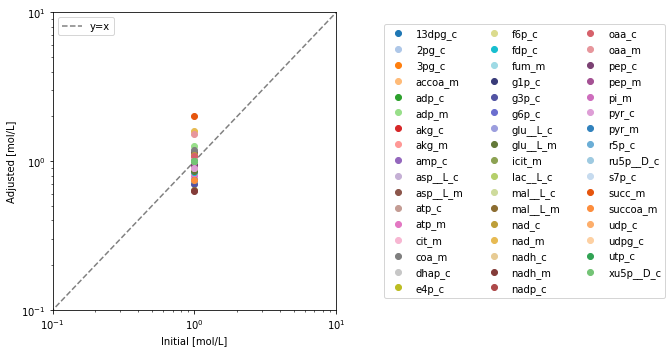

In [106]:
conc_comparison_fig, ax = plt.subplots(nrows=1, ncols=1,
                                       figsize=(5, 5))

plot_comparison(
    x=conc_df_2["IC"], y=conc_solution,
    compare="concentrations",
    observable=[mid for mid in conc_df_2.index], ax=ax,
    legend="right outside", plot_function="loglog", 
    xlim=(1e-1,1e1), ylim=(1e-1,1e1),
    xy_line=True,
    xy_legend="best", xlabel="Initial [mol/L]", ylabel="Adjusted [mol/L]")

conc_comparison_fig.tight_layout()
update_model_with_concentration_solution(
    liver, conc_solution, concentrations=True, inplace=True)

In [107]:
conc_solution_adjusted = conc_solution.to_frame()
conc_fig_df = pd.DataFrame()
conc_fig_df["Initial"] = conc_df_2["IC"]
conc_fig_df["Adjusted"] = conc_solution_adjusted["variables"]
conc_fig_df["Metabolite"] = conc_df_2.index
conc_fig_df

mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Initial  Adjusted Metabolite
reactions                              
13dpg_c          1  0.929387    13dpg_c
2pg_c            1  0.974847      2pg_c
3pg_c            1  0.977699      3pg_c
aacoa_m          1       NaN    aacoa_m
ac_c             1       NaN       ac_c
...            ...       ...        ...
udp_c            1  1.000000      udp_c
udpg_c           1  1.000000     udpg_c
urea_c           1       NaN     urea_c
utp_c            1  1.000000      utp_c
xu5p__D_c        1  1.000000  xu5p__D_c

[85 rows x 3 columns]

In [108]:
conc_fig_df.max()

Initial               1
Adjusted       2.013735
Metabolite    xu5p__D_c
dtype: object

In [109]:
conc_fig_df
range = np.linspace(0,1e3, len(conc_fig_df))
conc_fig_df["line"] = range
conc_fig_df["line_2"] = range
conc_fig_df

Initial  Adjusted Metabolite         line       line_2
reactions                                                        
13dpg_c          1  0.929387    13dpg_c     0.000000     0.000000
2pg_c            1  0.974847      2pg_c    11.904762    11.904762
3pg_c            1  0.977699      3pg_c    23.809524    23.809524
aacoa_m          1       NaN    aacoa_m    35.714286    35.714286
ac_c             1       NaN       ac_c    47.619048    47.619048
...            ...       ...        ...          ...          ...
udp_c            1  1.000000      udp_c   952.380952   952.380952
udpg_c           1  1.000000     udpg_c   964.285714   964.285714
urea_c           1       NaN     urea_c   976.190476   976.190476
utp_c            1  1.000000      utp_c   988.095238   988.095238
xu5p__D_c        1  1.000000  xu5p__D_c  1000.000000  1000.000000

[85 rows x 5 columns]

In [110]:
import pandas as pd
import altair as alt

In [111]:
conc_fig_comp = alt.Chart(conc_fig_df).mark_circle(size= 100).encode(
    alt.X("Initial", axis=alt.Axis( tickCount=5), scale=alt.Scale(type='log')),
    alt.Y('Adjusted',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('Metabolite', scale=alt.Scale(scheme='turbo')), 
    tooltip=['Metabolite', "Initial", "Adjusted"]
).properties(
    width=400,
    height=400).interactive()
conc_fig_comp
# rule = alt.Chart(conc_fig_df).mark_line(color='red').encode(
#     alt.X("line"),
#     alt.Y("line")).properties(
#     width=400,
#     height=400)
# rule
# (conc_fig_comp + rule)
# (conc_fig_comp + rule).properties(
#     width=400,
#     height=400).interactive()

alt.Chart(...)

In [112]:
# #Formulate QP minimization list for concentrations
# conc_solver = ConcSolver(
#     liver, 
#     excluded_metabolites=[
#     "h_c",
#     'h_i', 'h_m',
#     # 'o2_m', 'o2_c', 
# #         'h_e', 'h_m',
# #     'h2o_r','h2o_e',
#         "h2o_c",'h2o_m',
        
# #     "pi_e",
#     # "glc__D_e",
# #  "lac__L_e",
# #     "pyr_e"
#     ], 
#     excluded_reactions=[
        
# # 'NADPHM',
#  "PYRt2m","PEPtm", 'Htmi','MALtm', 'ATPtm', 'AKGMALtm','O2tm','H2Otm',  'CO2tm', 'PItm' ,'Htm'
        
        
#     #     "Ht", "H2Ot", "H2Oter",'PIter','PIt',
#     # 'G6Pter','GLCter','GLCt1','PYRt2m','PEPtm',
#     # 'L_LACt2r','PYRt2'
#     ],

#     constraint_buffer=1)

# conc_solver.setup_feasible_qp_problem(
# fixed_conc_bounds=list(liver.fixed))
# # fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
# #assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
# # conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.2)

# conc_solution = conc_solver.optimize()
# conc_solution

In [113]:
update_model_with_concentration_solution(
    liver, conc_solution, concentrations=True, inplace=True);

In [114]:
conc_solver.setup_sampling_problem(
    fixed_conc_bounds=list(liver.fixed),
    # fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    )
for variable in conc_solver.variables:
    try:
        met = liver.metabolites.get_by_id(variable.name)
        variable.lb, variable.ub = np.log([met.ic / 10, met.ic * 10])
    except:
        pass
conc_samples = sample_concentrations(conc_solver, n=n_models,  processes=4, seed=seed)
conc_samples.head()


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpgqu3eixs.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpqpl5_m8o.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros


pep_c     pep_m      pi_m     co2_m         gdp_m         gtp_m  \
0  1.812308  4.729969  9.397398  4.301111  2.513880e-10  2.459213e-10   
1  1.890340  3.112996  7.991930  2.814570  1.596370e-10  1.625948e-10   
2  2.041090  4.359212  6.756348  5.053430  2.708937e-10  1.574284e-10   
3  0.763772  1.067977  2.602538  2.743359  7.101563e-11  4.237281e-11   
4  0.428699  0.429226  2.677961  2.211245  7.399861e-11  4.050420e-11   

      oaa_m     adp_c     atp_c     pyr_c  ...        6pgc_c  ru5p__D_c  \
0  1.930846  1.621709  2.271302  0.670388  ...  5.544529e-11   0.528640   
1  0.938505  1.306477  1.813940  0.866226  ...  1.623729e-10   1.732135   
2  2.178566  1.165787  1.485547  0.771554  ...  6.661767e-11   0.714841   
3  0.641230  1.459410  1.133024  0.699651  ...  4.921637e-11   0.526389   
4  1.026206  0.433420  0.341610  0.245712  ...  1.408418e-11   0.177522   

      r5p_c  xu5p__D_c     s7p_c     e4p_c        h2o2_c         o2s_c  \
0  0.439554   0.439561  0.439687  0.404836  4.049525e-11  2.995314e-11   
1  0.633393   0.650618  0.650809  0.563275  5.634401e-11  4.172349e-11   
2  0.387157   0.390539  0.263014  0.255961  2.100037e-11  2.045808e-11   
3  0.304479   0.276951  0.188404  0.147757  1.331590e-11  1.626818e-11   
4  0.177503   0.173567  0.262450  0.262422  1.712494e-11  1.690117e-11   

        gthox_c       gthrd_c  
0  2.995746e-11  1.074282e-11  
1  4.182911e-11  1.234131e-11  
2  1.827427e-11  1.134147e-11  
3  1.608938e-11  1.117302e-11  
4  1.000217e-11  1.000109e-11  

[5 rows x 82 columns]

In [115]:
conc_samples

pep_c     pep_m      pi_m     co2_m         gdp_m         gtp_m  \
0   1.812308  4.729969  9.397398  4.301111  2.513880e-10  2.459213e-10   
1   1.890340  3.112996  7.991930  2.814570  1.596370e-10  1.625948e-10   
2   2.041090  4.359212  6.756348  5.053430  2.708937e-10  1.574284e-10   
3   0.763772  1.067977  2.602538  2.743359  7.101563e-11  4.237281e-11   
4   0.428699  0.429226  2.677961  2.211245  7.399861e-11  4.050420e-11   
5   0.556251  0.671248  9.201121  3.518228  1.935948e-10  1.083021e-10   
6   1.154508  1.225256  8.430619  5.279286  3.461538e-10  1.927116e-10   
7   1.344172  2.157789  6.121398  3.496242  5.693792e-10  3.252788e-10   
8   1.662210  5.852145  5.071392  3.922029  3.944422e-10  4.000035e-10   
9   1.423105  4.806419  7.760922  8.026783  3.762491e-10  3.136362e-10   
10  1.635282  8.629950  6.474449  7.553375  6.918625e-10  4.079590e-10   
11  2.231816  6.848707  5.029969  4.447277  4.855222e-10  3.811630e-10   
12  0.922346  2.171259  2.962756  4.255299  1.725417e-10  1.657700e-10   
13  1.455867  3.527252  3.007584  5.907337  3.920912e-10  4.061647e-10   
14  1.870480  4.948754  5.727860  6.792786  5.401661e-10  5.664373e-10   
15  1.762316  4.732135  9.197178  6.527213  4.908159e-10  5.144637e-10   

       oaa_m     adp_c     atp_c     pyr_c  ...        6pgc_c  ru5p__D_c  \
0   1.930846  1.621709  2.271302  0.670388  ...  5.544529e-11   0.528640   
1   0.938505  1.306477  1.813940  0.866226  ...  1.623729e-10   1.732135   
2   2.178566  1.165787  1.485547  0.771554  ...  6.661767e-11   0.714841   
3   0.641230  1.459410  1.133024  0.699651  ...  4.921637e-11   0.526389   
4   1.026206  0.433420  0.341610  0.245712  ...  1.408418e-11   0.177522   
5   1.654908  0.320788  0.471852  0.281312  ...  2.371679e-11   0.272247   
6   3.773959  0.708203  0.698638  0.726303  ...  5.108636e-11   0.475977   
7   1.606030  1.042006  1.470254  0.814052  ...  8.441154e-11   0.775534   
8   1.944661  5.474159  6.469389  0.471657  ...  1.043181e-11   0.132448   
9   2.151331  4.619517  5.167499  1.127869  ...  2.548985e-11   0.294009   
10  2.659688  4.341014  8.896584  0.783198  ...  1.620442e-11   0.182421   
11  1.572126  3.982682  8.814639  0.747234  ...  3.285891e-11   0.402313   
12  1.709006  1.812599  1.032613  1.007270  ...  1.517078e-11   0.203002   
13  4.941874  1.904981  2.786289  0.727993  ...  1.972299e-11   0.189703   
14  6.019766  2.540598  3.539966  1.137269  ...  1.950729e-11   0.202105   
15  2.811563  2.902255  3.377246  1.063769  ...  1.890702e-11   0.182666   

       r5p_c  xu5p__D_c     s7p_c     e4p_c        h2o2_c         o2s_c  \
0   0.439554   0.439561  0.439687  0.404836  4.049525e-11  2.995314e-11   
1   0.633393   0.650618  0.650809  0.563275  5.634401e-11  4.172349e-11   
2   0.387157   0.390539  0.263014  0.255961  2.100037e-11  2.045808e-11   
3   0.304479   0.276951  0.188404  0.147757  1.331590e-11  1.626818e-11   
4   0.177503   0.173567  0.262450  0.262422  1.712494e-11  1.690117e-11   
5   0.278056   0.272789  0.581467  0.581458  3.466357e-11  2.048009e-11   
6   0.341099   0.334859  0.608046  1.050638  6.219459e-11  4.827264e-11   
7   0.608166   0.997323  1.656606  2.109800  1.497530e-10  5.824924e-11   
8   0.132326   0.109883  0.146066  0.146553  1.433919e-11  1.390025e-11   
9   0.293973   0.153880  0.211243  0.216004  2.165803e-11  1.904263e-11   
10  0.182412   0.151588  0.199157  0.193077  1.938589e-11  1.846829e-11   
11  0.286248   0.236905  0.193680  0.266345  2.674436e-11  2.545130e-11   
12  0.202966   0.167145  0.167115  0.173068  1.350173e-11  1.349934e-11   
13  0.189703   0.177345  0.185889  0.189271  1.567349e-11  1.185366e-11   
14  0.216823   0.129940  0.168631  0.173230  1.416175e-11  1.066580e-11   
15  0.225753   0.140083  0.189755  0.173880  1.368264e-11  1.019229e-11   

         gthox_c       gthrd_c  
0   2.995746e-11  1.074282e-11  
1   4.182911e-11  1.234131e-11  
2   1.827427e-11  1.134147e-11  
3   1.608938e-11  1.117302e-11  
4   1.000217e-

In [116]:
# conc_solver.setup_sampling_problem(
#     conc_percent_deviation=0.75,
#     Keq_percent_deviation=0)
# print(conc_solver.problem_type)

# samples = sample_concentrations(conc_solver, n=20)
# samples.head()

In [117]:
# type(conc_samples)

In [ ]:
# mean_conc = pd.DataFrame(index = conc_samples.columns)
# means =[]
# std=[]
# for i in conc_samples.columns:
#     index = conc_samples[i].mean()
#     # print(index)
#     means.append(index)
#     std.append(conc_samples[i].std())
# mean_conc["Mean"] = means
# mean_conc["ST_dev"] = std
# mean_conc

In [ ]:
# print("Initial Conditions\n------------------")

# for reaction in liver.reactions:
#     #Setting inital condition of metabolties from HEPATOKIN  #M 
#     for met in reaction.metabolites:
#         if met.id in mean_conc.index:
#             mid=met.id
#             metabolite = reaction.metabolites
#             ic_value = mean_conc.loc[mid,'Mean']
#             row = [mid,ic_value]
#             # column = [ic_value]
#             # conc_df.append(row)
#             met.ic =  ic_value            
# for metabolite, ic_value in liver.initial_conditions.items():
#     print("{0}: {1}".format(metabolite, ic_value))

In [116]:
percs_df = pd.DataFrame()

percs = liver.calculate_PERCs(
    fluxes={
        r: v for r, v in liver.steady_state_fluxes.items()
        if not r.boundary},
    update_reactions=True)

percs_df = pd.DataFrame.from_dict(percs, orient='index')
percs_df

0
kf_PEPtm   100000.000000
kf_PEPCKm  100000.000000
kf_PYK          3.287645
kf_PCm     100000.000000
kf_LDH_L   100000.000000
...                  ...
kf_TKT2    100000.000000
kf_TALA    100000.000000
kf_GTHPi   100000.000000
kf_GTHOr   100000.000000
kf_NADPHM  100000.000000

[68 rows x 1 columns]

In [120]:
models_for_ensemble = []
for idx, conc_sample in conc_samples.iterrows():
    # Make copy of new model
    new_model = liver.copy()
    new_model.id += "_C{0:d}".format(idx)
    # Get concentration sample and update model with sample
    new_model.update_initial_conditions(conc_sample.to_dict())

    # Determine imbalances in the reduced network
    fluxes = np.array(list(new_model.steady_state_fluxes.values()))
    imbalanced_metabolites = new_model.S.dot(fluxes)

    # Iterate through metabolites
    for mid, imbalance in imbalanced_metabolites.iteritems():
        # Ignore balanced metabolites
        if imbalance == 0:
            continue
        # Get metabolite object
        met = new_model.metabolites.get_by_id(mid)

        # Add boundary reactions for imbalanced metabolites
        boundary_type = "sink"    
        # Add boundary reaction with imbalance as flux value
        boundary_reaction = new_model.add_boundary(
            mid, boundary_type, boundary_condition=met.ic)

        boundary_reaction.Keq = 1
        if imbalance < 0:
            boundary_reaction.reverse_stoichiometry(inplace=True)
            imbalance = -imbalance

        boundary_reaction.kf = imbalance / met.ic
        boundary_reaction.steady_state_flux = imbalance
        try:
            # Update PERCs
            percs = new_model.calculate_PERCs(
                fluxes={
                    r: v for r, v in new_model.steady_state_fluxes.items()
                    if not r.boundary},
                update_reactions=True)
            df_p = pd.DataFrame.from_dict(percs, orient='index')
            df_p.columns = [("No."+ str(idx))]
            percs_df = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
        except:
            print("Negative PERCs for {0}".format(new_model.id))

            df_p = pd.DataFrame.from_dict(percs, orient='index')
            df_p.columns = [("No."+ str(idx))]
            percs_df = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
            
            continue



        
    models_for_ensemble.append(new_model)
print("Number of models in ensemble: {0:d}".format(
    len(models_for_ensemble)))

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpaifzo23l.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp8ps6b7bd.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp9vb1b117.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C0
Negative PERCs for Core_Model_C0
Negative PERCs for Core_Model_C0


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.0_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C0
Negative PERCs for Core_Model_C0


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.0_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C0
Negative PERCs for Core_Model_C0


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.0_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C0
Negative PERCs for Core_Model_C0


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.0_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C0
Negative PERCs for Core_Model_C0


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.0_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C0
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp7i3c8_mm.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpbeb0kct_.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp1arub4nw.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.1_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.1_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.1_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.1_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp00a9acyu.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpi3h_pcgq.lp


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.1_x'} in the result is deprecated and will raise a MergeError in a future version.


Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpem2mk6ml.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C2
Negative PERCs for Core_Model_C2
Negative PERCs for Core_Model_C2
Negative PERCs for Core_Model_C2


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.2_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C2
Negative PERCs for Core_Model_C2


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.2_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C2
Negative PERCs for Core_Model_C2


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.2_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C2
Negative PERCs for Core_Model_C2


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.2_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C2
Negative PERCs for Core_Model_C2
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp6fa7hwdj.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.2_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpa8rz6tsn.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp27jbc8zh.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.3_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.3_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.3_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.3_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp6_8jki4s.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp9afthwtt.lp


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:43 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.3_x'} in the result is deprecated and will raise a MergeError in a future version.


Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp56wyq3vt.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C4
Negative PERCs for Core_Model_C4
Negative PERCs for Core_Model_C4
Negative PERCs for Core_Model_C4


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.4_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C4
Negative PERCs for Core_Model_C4


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.4_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C4
Negative PERCs for Core_Model_C4


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.4_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C4
Negative PERCs for Core_Model_C4


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.4_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C4
Negative PERCs for Core_Model_C4
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp10au6mje.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpzcs63e1o.lp


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.4_x'} in the result is deprecated and will raise a MergeError in a future version.


Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpme_t0bhu.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C5
Negative PERCs for Core_Model_C5
Negative PERCs for Core_Model_C5
Negative PERCs for Core_Model_C5


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.5_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C5
Negative PERCs for Core_Model_C5


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.5_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C5
Negative PERCs for Core_Model_C5


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.5_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C5
Negative PERCs for Core_Model_C5


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.5_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C5
Negative PERCs for Core_Model_C5
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp4kjxklem.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.5_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp0agv4gmx.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpzaiizpdt.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C6
Negative PERCs for Core_Model_C6
Negative PERCs for Core_Model_C6
Negative PERCs for Core_Model_C6


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.6_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C6
Negative PERCs for Core_Model_C6


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.6_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C6
Negative PERCs for Core_Model_C6


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.6_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C6
Negative PERCs for Core_Model_C6


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.6_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C6
Negative PERCs for Core_Model_C6
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpo5wia7wo.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.6_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpskr1_8a8.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp6mi5y4to.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C7
Negative PERCs for Core_Model_C7
Negative PERCs for Core_Model_C7
Negative PERCs for Core_Model_C7


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.7_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C7
Negative PERCs for Core_Model_C7


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.7_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C7
Negative PERCs for Core_Model_C7


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.7_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C7
Negative PERCs for Core_Model_C7


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.7_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C7
Negative PERCs for Core_Model_C7
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpw37nx4g8.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp4b8v5txo.lp


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.7_x'} in the result is deprecated and will raise a MergeError in a future version.


Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpxa_5kgjt.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C8
Negative PERCs for Core_Model_C8
Negative PERCs for Core_Model_C8
Negative PERCs for Core_Model_C8


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.8_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C8
Negative PERCs for Core_Model_C8


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.8_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C8
Negative PERCs for Core_Model_C8


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.8_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C8
Negative PERCs for Core_Model_C8


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.8_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C8
Negative PERCs for Core_Model_C8
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpbriapldm.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.8_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpqryx196w.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp11agphnp.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C9
Negative PERCs for Core_Model_C9
Negative PERCs for Core_Model_C9
Negative PERCs for Core_Model_C9


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.9_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C9
Negative PERCs for Core_Model_C9


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.9_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C9
Negative PERCs for Core_Model_C9


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.9_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C9


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.9_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C9
Negative PERCs for Core_Model_C9
Negative PERCs for Core_Model_C9
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpzyym1ynf.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.9_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpnoixrjnu.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpw6n9x5m4.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C10
Negative PERCs for Core_Model_C10
Negative PERCs for Core_Model_C10
Negative PERCs for Core_Model_C10


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.10_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C10
Negative PERCs for Core_Model_C10


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.10_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C10
Negative PERCs for Core_Model_C10


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.10_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C10
Negative PERCs for Core_Model_C10


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.10_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C10
Negative PERCs for Core_Model_C10
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmplb1f8vej.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.10_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpro7c93gu.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp0sgnzee3.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C11
Negative PERCs for Core_Model_C11
Negative PERCs for Core_Model_C11
Negative PERCs for Core_Model_C11


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.11_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C11
Negative PERCs for Core_Model_C11


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.11_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C11
Negative PERCs for Core_Model_C11


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.11_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C11
Negative PERCs for Core_Model_C11


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.11_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C11
Negative PERCs for Core_Model_C11
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp4khdzsrk.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.11_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpglsuz6or.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpwyew56bs.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C12
Negative PERCs for Core_Model_C12
Negative PERCs for Core_Model_C12
Negative PERCs for Core_Model_C12


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.12_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C12
Negative PERCs for Core_Model_C12


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.12_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C12
Negative PERCs for Core_Model_C12


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.12_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C12
Negative PERCs for Core_Model_C12


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.12_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C12
Negative PERCs for Core_Model_C12
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpczlmgwft.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.12_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpx3fzpa8y.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpbty5ce6y.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C13
Negative PERCs for Core_Model_C13
Negative PERCs for Core_Model_C13
Negative PERCs for Core_Model_C13


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.13_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C13
Negative PERCs for Core_Model_C13


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.13_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C13
Negative PERCs for Core_Model_C13


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.13_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C13
Negative PERCs for Core_Model_C13


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.13_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C13
Negative PERCs for Core_Model_C13
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpdtesy6xa.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpi7aisyf3.lp


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.13_x'} in the result is deprecated and will raise a MergeError in a future version.


Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpze9z4glx.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C14
Negative PERCs for Core_Model_C14
Negative PERCs for Core_Model_C14
Negative PERCs for Core_Model_C14


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.14_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C14
Negative PERCs for Core_Model_C14


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.14_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C14
Negative PERCs for Core_Model_C14


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.14_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C14
Negative PERCs for Core_Model_C14


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.14_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C14
Negative PERCs for Core_Model_C14
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpn_35lojj.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.14_x'} in the result is deprecated and will raise a MergeError in a future version.


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp2d5je_nz.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmps62w7yud.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C15
Negative PERCs for Core_Model_C15
Negative PERCs for Core_Model_C15
Negative PERCs for Core_Model_C15


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.15_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C15
Negative PERCs for Core_Model_C15


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.15_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C15
Negative PERCs for Core_Model_C15


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.15_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C15
Negative PERCs for Core_Model_C15


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.15_x'} in the result is deprecated and will raise a MergeError in a future version.


Negative PERCs for Core_Model_C15
Negative PERCs for Core_Model_C15
Number of models in ensemble: 16


C:\Users\sicil\AppData\Local\Temp\ipykernel_44272\297862604.py:49 FutureWarning: Passing 'suffixes' which cause duplicate columns {'No.15_x'} in the result is deprecated and will raise a MergeError in a future version.


In [123]:
percs_df.T.head()

kf_PEPtm  kf_PEPCKm    kf_PYK    kf_PCm  kf_LDH_L   kf_PGMT  \
0       100000.0   100000.0  3.287645  100000.0  100000.0  100000.0   
No.0_x  100000.0   100000.0  3.287645  100000.0  100000.0  100000.0   
No.0_y  100000.0   100000.0  3.287645  100000.0  100000.0  100000.0   
No.0_x  100000.0   100000.0  3.287645  100000.0  100000.0  100000.0   
No.0_y  100000.0   100000.0  3.287645  100000.0  100000.0  100000.0   

        kf_GLPASE2  kf_GLDBRAN  kf_GLBRAN  kf_GLPASE1  ...    kf_PGL  \
0         100000.0    100000.0   100000.0    100000.0  ...  100000.0   
No.0_x    100000.0    100000.0   100000.0    100000.0  ...  100000.0   
No.0_y    100000.0    100000.0   100000.0    100000.0  ...  100000.0   
No.0_x    100000.0    100000.0   100000.0    100000.0  ...  100000.0   
No.0_y    100000.0    100000.0   100000.0    100000.0  ...  100000.0   

          kf_GND    kf_RPI    kf_RPE   kf_TKT1   kf_TKT2   kf_TALA  kf_GTHPi  \
0       100000.0  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0   
No.0_x  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0   
No.0_y  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0   
No.0_x  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0   
No.0_y  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0  100000.0   

        kf_GTHOr  kf_NADPHM  
0       100000.0   100000.0  
No.0_x  100000.0   100000.0  
No.0_y  100000.0   100000.0  
No.0_x  100000.0   100000.0  
No.0_y  100000.0   100000.0  

[5 rows x 68 columns]

In [121]:
models_for_ensemble = []
for idx, conc_sample in conc_samples.iterrows():
    # Make copy of new model
    new_model = liver.copy()
    new_model.id += "_C{0:d}".format(idx)
    # Get concentration sample and update model with sample
    new_model.update_initial_conditions(conc_sample.to_dict())

    # # Determine imbalances in the reduced network
    # fluxes = np.array(list(new_model.steady_state_fluxes.values()))
    # imbalanced_metabolites = new_model.S.dot(fluxes)

    # # Iterate through metabolites
    # for mid, imbalance in imbalanced_metabolites.iteritems():
    #     # Ignore balanced metabolites
    #     if imbalance == 0:
    #         continue
    #     # Get metabolite object
    #     met = new_model.metabolites.get_by_id(mid)

    #     # Add boundary reactions for imbalanced metabolites
    #     boundary_type = "sink"    
    #     # Add boundary reaction with imbalance as flux value
    #     boundary_reaction = new_model.add_boundary(
    #         mid, boundary_type, boundary_condition=met.ic)

    #     boundary_reaction.Keq = 1
    #     if imbalance < 0:
    #         boundary_reaction.reverse_stoichiometry(inplace=True)
    #         imbalance = -imbalance

    #     boundary_reaction.kf = imbalance / met.ic
    #     boundary_reaction.steady_state_flux = imbalance
    try:
        # Update PERCs
        percs = new_model.calculate_PERCs(
            fluxes={
                r: v for r, v in new_model.steady_state_fluxes.items()
                if not r.boundary},
            update_reactions=True)
        print((percs))
        # for k,v in percs.items():
        #     percs_df[k] = v
        df_2 = pd.DataFrame(percs)
        pd.append([percs_df, df_2])

    except:
        print("Negative PERCs for {0}".format(new_model.id))
        # percs = new_model.calculate_PERCs(fluxes={
        #         r: v for r, v in new_model.steady_state_fluxes.items()
        #         if not r.boundary},
        #     update_reactions=True)
        # for k,v in percs.items():
        #     percs_df[k] = v
        # df_2 = pd.DataFrame(percs)
        # pd.append([percs_df, df_2])
        continue



        
    models_for_ensemble.append(new_model)
print("Number of models in ensemble: {0:d}".format(
    len(models_for_ensemble)))

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpcxezaf9b.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpevv7sk9e.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp6kijszpp.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
Negative PERCs for Core_Model_C0
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpx28r9nlj.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpo_tvz9ao.lp
Reading time = 0.01 seconds
: 86 rows, 154 columns, 578 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpcfuv4b0i.lp
Reading time = 0.01 seconds
: 38 rows, 120 columns, 171 nonzeros
{'kf_PEPtm': 100000.0, 'kf_PEPCKm': 100000.0, 'kf_PYK': 1.0857301440648124, 'kf_PCm': 100000.0, '

In [122]:
percs_df

Empty DataFrame
Columns: []
Index: []

In [ ]:
# Determine imbalances in the reduced network
fluxes = np.array(list(liver.steady_state_fluxes.values()))
imbalanced_metabolites = liver.S.dot(fluxes)

# Iterate through metabolites
for mid, imbalance in imbalanced_metabolites.iteritems():
    # Ignore balanced metabolites
    if imbalance == 0:
        continue
    # Get metabolite object
    met = liver.metabolites.get_by_id(mid)

    # Add boundary reactions for imbalanced metabolites
    boundary_type = "sink"    
    # Add boundary reaction with imbalance as flux value
    boundary_reaction = liver.add_boundary(
        mid, boundary_type, boundary_condition=met.ic)

    boundary_reaction.Keq = 1
    if imbalance < 0:
        boundary_reaction.reverse_stoichiometry(inplace=True)
        imbalance = -imbalance

    boundary_reaction.kf = imbalance / met.ic
    boundary_reaction.steady_state_flux = imbalance
    print(boundary_reaction, imbalance)
    liver.calculate_PERCs(
        fluxes={
            r: v for r, v in liver.steady_state_fluxes.items()
            if not r.boundary},
        update_reactions=True)



In [ ]:
percs = liver.calculate_PERCs(fluxes={
                r: v for r, v in liver.steady_state_fluxes.items()
                if not (r.boundary  
                       )
}, update_reactions=True)
print(percs)                      

print("Forward Rate Constants\n----------------------")
for reaction in liver.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

In [ ]:
for i,v in percs.items():
    print(i,v)

In [ ]:
#Function to add underscore in front of metabolite identifiers which start with a number
## fix this only after getting Keq from equlibrator because bigg doesn't have _13dpg for example
def prefix_number_id(id_str):
    """Prefix identifiers that start with numbers."""
    if re.match(r"^\d", id_str):
        id_str = "_" + id_str
    return id_str

In [ ]:
result = conc_solution.concentrations.get(key = '3pg_c')
  
# Print the result
print(result)

In [ ]:
type(conc_solution.concentrations)

In [ ]:
liver.boundary_conditions['co2_b']=0.657953 ##M
liver.boundary_conditions['gdp_b']=0.657953 ##M
liver.boundary_conditions['gtp_b']=1.519864 ##M
liver.boundary_conditions['o2_b']=2.718281828459044e-10 ##M
liver.boundary_conditions['o2s_b']=1.608881578652446e-10 ##M
liver.boundary_conditions['h2o_b']=1 ##M
liver.boundary_conditions['h_b']=1 ##M
liver.boundary_conditions['hco3_b']=0.001827 ##M
liver.boundary_conditions['13dpg_b']=3.1086784944737202e-06 ##M
liver.boundary_conditions['2pg_b']=3.018819493277219e-05
liver.boundary_conditions['3pg_b']=0.00013918054936288695

In [ ]:
#Loop to edit the names using "prefix_number_id" function defined earlier
for metabolite in liver.metabolites:
    new_met_id = prefix_number_id(metabolite.id)
    metabolite.id = new_met_id
    print(metabolite.id)
liver.repair()

In [ ]:
# numbers = ["3pg_b", "2pg_b", "13dpg_b"]
for metabolite in liver.metabolites:
    # metabolite = liver.metabolites.get_by_id(metabolite)
    new_met_id = prefix_number_id(metabolite.id)
    metabolite.id = new_met_id
liver.repair()

In [ ]:
qcqa_model(liver, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)

In [ ]:
# Setup simulation object
simG=Simulation(liver, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = simG.simulate(liver, time=(0, 1e8))
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [ ]:
# Loading reaction data as JSON file to maintain data types as dictionaries 
model_json = os.path.join(model_dir,"Gly_Gluco_no_cmpt.json")
json.save_json_model(mass_model=liver, filename=model_json)